In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False 
pd.options.display.float_format = '{:.2f}'.format
# from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,10)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=17) 

from pandas.api.types import is_numeric_dtype, is_integer_dtype, is_float_dtype, is_bool_dtype
from pandas.api.types import is_object_dtype, is_string_dtype, is_categorical_dtype, is_datetime64_dtype

In [3]:
scale = pd.read_csv('SCALE불량.csv', engine = 'python', encoding = 'CP949')
scale.head()
new_scale = pd.read_csv('total_scale.csv', encoding = 'utf-8')

In [4]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

##### 잘못된 변수 유형 변경 및 목표변수 값 변경

In [5]:
scale.drop('PLATE_NO', axis =1, inplace =True)
scale.drop('ROLLING_DATE', axis =1, inplace =True)
scale['SCALE'] =scale['SCALE'].apply(lambda x : 1 if x =='불량' else 0)
scale['HSB'] = scale['HSB'].apply(lambda x : 1 if x == '적용' else 0)
scale['FUR_NO_ROW'] = scale['FUR_NO_ROW'].astype('object')
scale['ROLLING_DESCALING'] =scale['ROLLING_DESCALING'].astype('object') 

In [6]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

### PLATE_NO, ROLLING_DATE 변수는 자재번호와 압연시행 날짜를 말하는 변수이다. 
### 압연시행 날짜는 이전 EDA에서  2008년 8월 1일~2일의 짧은 시계열을 가진 변수로 통계적으로 검증할 Sample의 수가 적기 때문에 제거한다.

## 1. 변수명 확인  

### 순서대로 후판 제조번호, 압연일자, 불량유무, 제품규격, 강종, 두께, 폭, 길이, 중량  

### 가열로호기, 가열로 작업순번, 가열대 온도, 가열대시간, 균열대온도, 균열대시간, 가열로 시간
### 가열대 추출온도, 압연온도, HSB적용여부, 디스케일링 횟수, 작업조 

#### 1-1 관련변수 그룹
#### 생산지시 관련 변수 : 두께, 폭, 길이, 중량  
#### 제품 종류 관련 변수 : 강종, 제품규격
#### 가열로 관련 변수 : 가열로 호기, 가열로 작업 순번 ,추출온도 
#### 가열로 가열대 관련 변수 : 가열대 온도, 가열대 시간
#### 가열로 균열대 관련 변수 : 균열대 온도. 균열대 시간
#### 압연공정 관련 변수 : 압연온도, HSB적용여부, Descaling count
#### 작업자 관련 변수 : 작업조

## 2 EDA 

In [7]:
## 불량
pro = scale[scale['SCALE']== 1]
## 양품
no = scale[scale['SCALE']== 0]
print('불량 갯수 {}'.format(len(pro)))
display(pro.head())
print('양품 갯수 {}'.format(len(no)))
display(no.head())


불량 갯수 231


SCALE        SPEC STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT FUR_NO  \
11      1      COMMON         T8   38.43     3129   16187   30560    3호기   
15      1   GL-E32-TM         T1   50.46     2185   21767   37680    3호기   
60      1      COMMON         T8   65.69     2498   11978   15430    1호기   
71      1  BV-EH36-TM         T8   73.71     2725   11009   17360    3호기   
79      1   GL-E36-TM         T8   75.71     2505    9249   13770    1호기   

   FUR_NO_ROW  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
11          2         1131          120         1125           68       299   
15          1         1127          127         1123           71       312   
60          1         1142          110         1134           73       343   
71          2         1142           93         1134           61       355   
79          2         1142           82         1131           69       314   

    FUR_EXTEMP  ROLLING_TEMP_T5  HSB ROLLING_DESCALING WORK_GR  
11        1125             1057    1                 8      2조  
15        1123              929    1                 5      2조  
60        1134              851    1                 5      4조  
71        1134              847    0                 6      1조  
79        1131              847    0                 6      4조

양품 갯수 489


SCALE        SPEC STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT FUR_NO  \
0      0  AB/EH32-TM         T1   32.25     3707   15109   14180    1호기   
1      0  AB/EH32-TM         T1   32.25     3707   15109   14180    1호기   
2      0   NV-E36-TM         T8   33.27     3619   19181   18130    2호기   
3      0   NV-E36-TM         T8   33.27     3619   19181   18130    2호기   
4      0  BV-EH36-TM         T8   38.33     3098   13334   12430    3호기   

  FUR_NO_ROW  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
0          1         1144          116         1133           59       282   
1          2         1144          122         1135           53       283   
2          1         1129          116         1121           55       282   
3          2         1152          125         1127           68       316   
4          1         1140          134         1128           48       314   

   FUR_EXTEMP  ROLLING_TEMP_T5  HSB ROLLING_DESCALING WORK_GR  
0        1133              934    1                 8      2조  
1        1135              937    1                 8      2조  
2        1121              889    1                 8      3조  
3        1127              885    1                 8      3조  
4        1128              873    1                 8      1조

In [8]:
# 전체적인 불량율 계산을 위한 피보팅
pv_table = scale.groupby('SCALE').size().to_frame(name ='count').reset_index()
pv_table
di_pv = pv_table.pivot_table(index ='SCALE', aggfunc ='sum',margins = True)
di_pv
di_pv['ratio'] = di_pv['count'][1] /di_pv['count']['All']
display(di_pv)

count  ratio
SCALE              
0        489   0.32
1        231   0.32
All      720   0.32

In [9]:
new_scale.drop('강판번호', axis =1, inplace =True)
new_scale.drop('작업날짜', axis =1, inplace =True)
new_scale.drop('작업날', axis =1, inplace =True)
new_scale.drop('작업시간', axis =1, inplace =True)
new_scale

SCALE        제품규격  강종    두께     폭     길이     중량   호기  작업순번  가열대온도  가열대시간  \
0        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     1   1144    116   
1        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     2   1144    122   
2        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     1   1129    116   
3        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     2   1152    125   
4        0  BV-EH36-TM  T8 38.33  3098  13334  12430  3호기     1   1140    134   
..     ...         ...  ..   ...   ...    ...    ...  ...   ...    ...    ...   
715      0      NV-A32  C0 18.11  3260  40586  37620  1호기     1   1174     66   
716      1       NK-KA  C0 20.14  3580  38639  21870  3호기     1   1172     72   
717      0      NV-A32  C0 16.60  3441  43688  19590  2호기     2   1169     65   
718      0        LR-A  C0 18.92  3401  41455  20940  1호기     2   1142     55   
719      0      GL-A32  C0 16.09  3400  54209  69840  3호기     1   1186     82   

     균열대온도  균열대시간  가열로시간  추출온도  압연온도 HSB적용여부  Descaling횟수 WORK_GR  
0     1133     59    282  1133   934      적용            8      2조  
1     1135     53    283  1135   937      적용            8      2조  
2     1121     55    282  1121   889      적용            8      3조  
3     1127     68    316  1127   885      적용            8      3조  
4     1128     48    314  1128   873      적용            8      1조  
..     ...    ...    ...   ...   ...     ...          ...     ...  
715   1160     71    240  1160   965      적용           10      3조  
716   1164     62    245  1164  1005      적용            8      2조  
717   1163     77    247  1163   948      적용           10      4조  
718   1151     86    246  1151   948      적용           10      4조  
719   1169     45    239  1169   957      적용           10      2조  

[720 rows x 19 columns]

In [10]:
new_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SCALE        720 non-null    int64  
 1   제품규격         720 non-null    object 
 2   강종           720 non-null    object 
 3   두께           720 non-null    float64
 4   폭            720 non-null    int64  
 5   길이           720 non-null    int64  
 6   중량           720 non-null    int64  
 7   호기           720 non-null    object 
 8   작업순번         720 non-null    int64  
 9   가열대온도        720 non-null    int64  
 10  가열대시간        720 non-null    int64  
 11  균열대온도        720 non-null    int64  
 12  균열대시간        720 non-null    int64  
 13  가열로시간        720 non-null    int64  
 14  추출온도         720 non-null    int64  
 15  압연온도         720 non-null    int64  
 16  HSB적용여부      720 non-null    object 
 17  Descaling횟수  720 non-null    int64  
 18  WORK_GR      720 non-null    object 
dtypes: float

### 전체적인 불량율 32 %

In [11]:
def draw_col1(df, steel_kind):
    if steel_kind!= 'All':
        df = df[df['강종']==steel_kind]
    
    numeric_cols = df.select_dtypes(exclude = 'object')
    
    col_sum =len(numeric_cols.columns)
    
    nrows1= (col_sum // 4) + 1
    n = 0
    m = 0
    
    fig, ax = plt.subplots(nrows1 , 4 , figsize = ( 15,15))
    fig.subplots_adjust(top=0.95)
    fig.suptitle('강종 : {} 의 연속변수 확인 '.format(steel_kind))
    for i in numeric_cols.columns:
        pro = numeric_cols[numeric_cols['SCALE']==1]
        no = numeric_cols[numeric_cols['SCALE']==0]
        
#         print(n,m)
        sns.histplot(no[i]  , color = 'blue',label = '양품',ax= ax[n,m])
        sns.histplot(pro[i] , color = 'red',label ='불량' ,ax= ax[n,m])
        ax[n,m].set_xlabel(i)
        ax[n,m].legend(loc ='upper right')
        
        m+=1 
        if m == 4:
            m = 0
            n +=1
        elif n == nrows1:
            break
#     fig.tight_layout() 

In [12]:
    def draw_ot_col(df, col, steel_kind):
        df= df[df['STEEL_KIND'] == steel_kind]
        object_cols = df.select_dtypes('object')
        n1= 0
        m1 = 0
        plt.figure(figsize =(8,5))
        plt.title('강종 : {}'.format(steel_kind))
        sns.countplot(x = col,hue="SCALE", data=df)
        plt.xticks(rotation = 90)
        plt.show()
                

In [13]:
def two_T_test(df, steel_kind):
    df =df[df['강종']== steel_kind]

#### 2 - 강종 별 불량율 확인  --- : 전체 평균 불량율 32.4 %

In [14]:
for i in new_scale.강종.unique():
    sk = new_scale[new_scale['강종']==i ]
    sk1 = sk.SCALE.value_counts().to_frame(name = 'count').T
    if len(sk1.columns) !=2:
        sk1['ratio'] = 'nan'
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        display('불량율 측정불가')
        print()
    else:
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        sk1['ratio'] = (sk1[1]/  (sk1[0]+sk1[1])) * 100
        display('불량율 :', round(sk1['ratio']['count'],3))
        print()
        
    

---강종 : T1--- 제품 수 : 18


'불량율 :'

11.111


---강종 : T8--- 제품 수 : 95


'불량율 :'

5.263


---강종 : T0--- 제품 수 : 16


'불량율 :'

12.5


---강종 : T5--- 제품 수 : 43


'불량율 :'

4.651


---강종 : C0--- 제품 수 : 503


'불량율 :'

42.147


---강종 : C3--- 제품 수 : 7


'불량율 :'

14.286


---강종 : C1--- 제품 수 : 1


'불량율 측정불가'


---강종 : T7--- 제품 수 : 35


'불량율 :'

17.143


---강종 : T3--- 제품 수 : 2


'불량율 측정불가'

#### 2- 강종별 불량율 확인 결과 
#### C0의 불량율이 42.147%로 평균 불량율 32.4% 보다 월등히 높은 것을 확인 할 수 있음
#### 따라서 불량의 상당 수는 C0 강종에서 발생하는 것을 알 수 있다.

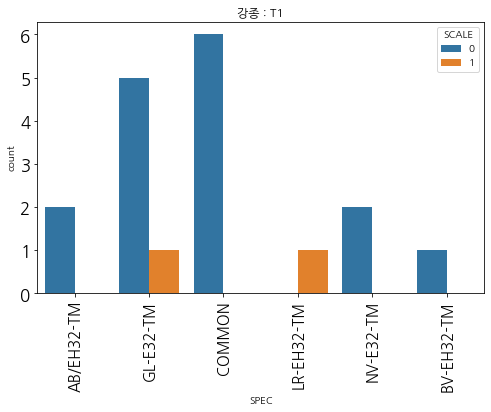

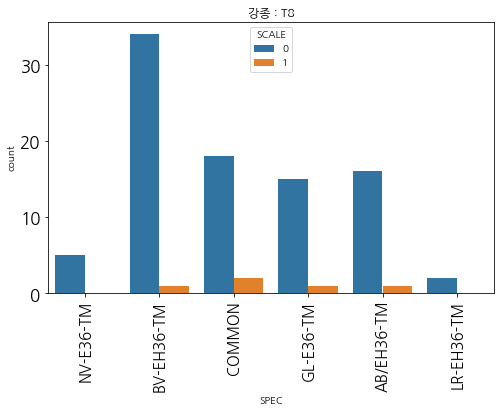

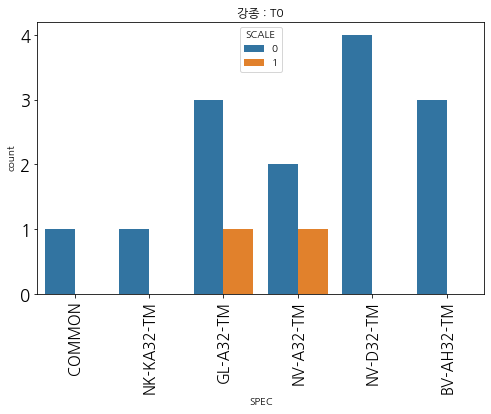

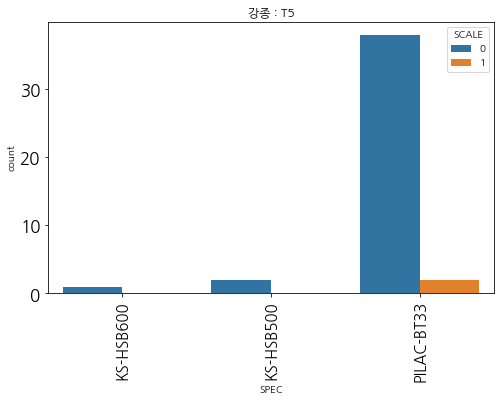

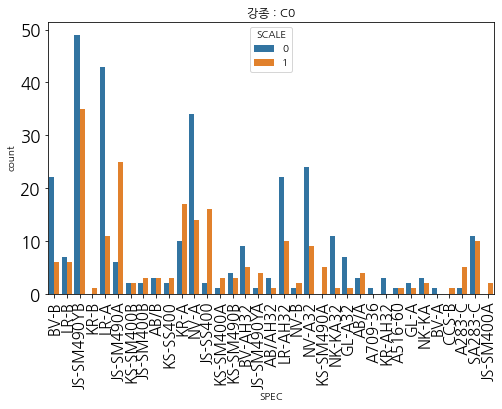

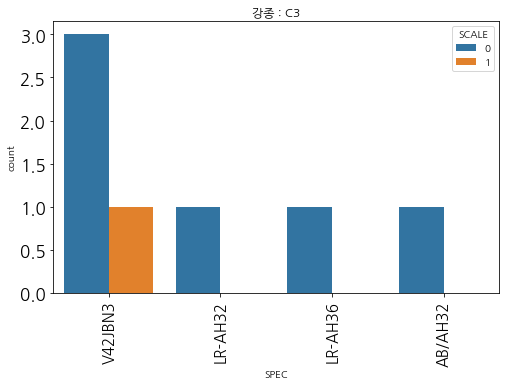

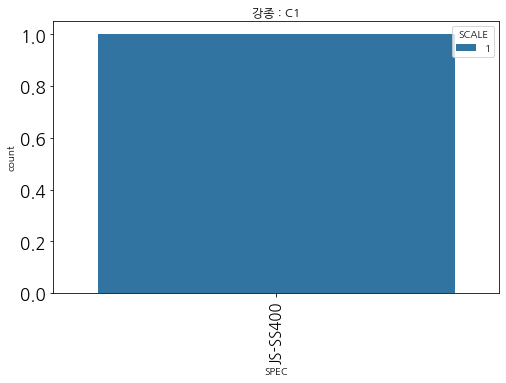

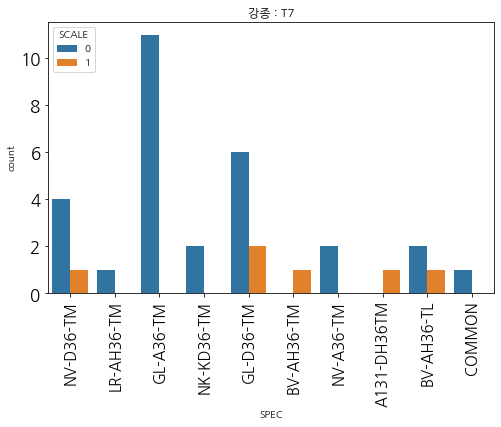

In [15]:
for i in scale['STEEL_KIND'].unique():
    draw_ot_col(scale,'SPEC', i)

#### 강종별로 특정 제품규격에서 불량이 많이 발생하는 것을 알 수있다.

#### 원인분석시 불량판정으로 유효한 변수로 사용할 수 있을 것 같음.

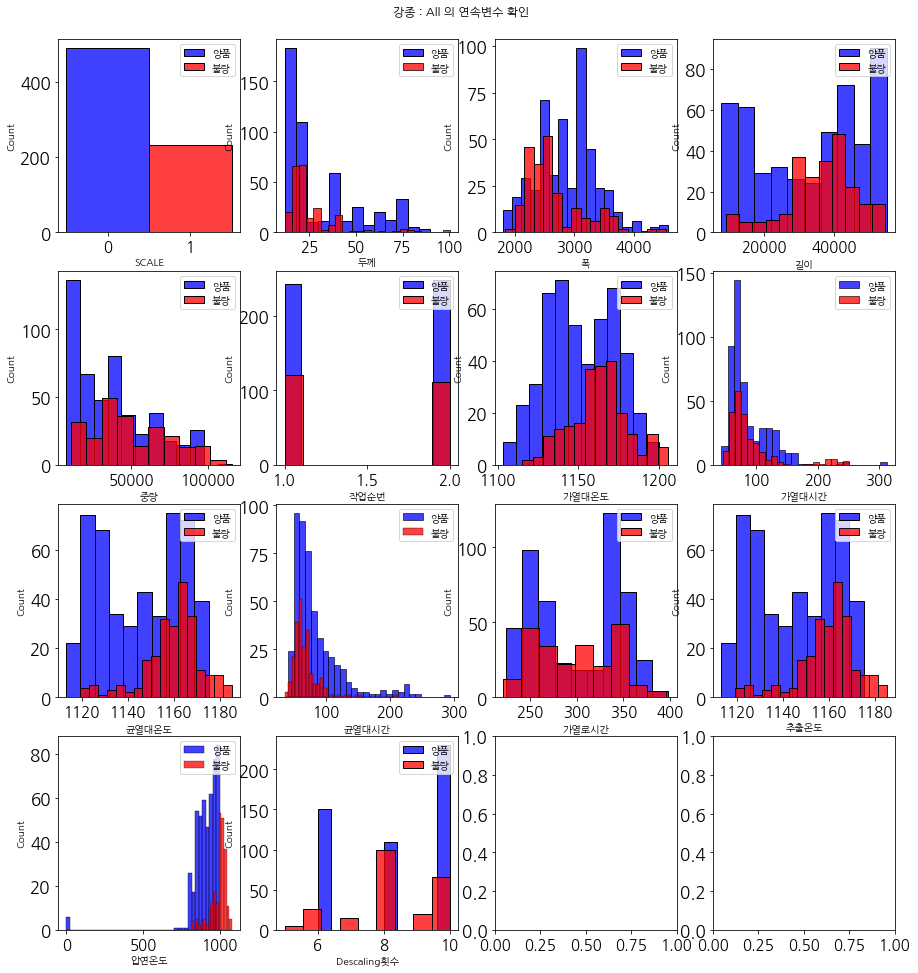

In [16]:
draw_col1(new_scale, 'All')

### 2-1 그룹화 x 전체 연속변수 분포 확인 
#### ------------------------------------------------------------------------------------------------------------------  
PT_TICK  두께 : 지시 두께가 클 수록 불량이 적게 발생하는 경향을 보임

PT_WIDH  폭 : 2000~ 3000mm에서 불량이 많이 발생하는 경향을 보인다.

PT_LETH  플레이트 길이 : 플레이트 길이가 길수록 불량이 많이 발생하는 경향을 보임.

PT_WHIGHT 플레이트 중량 : 중량이 커질수록 불량 %가 증가하는 경향을 보임  

#### ------------------------------------------------------------------------------------------------------------------  

FUR_ROW_NUM : 가열로 작업순서 - 그래프상으로는 불량의 비율이 비슷해보임.

가열로 가열대 온도 : 1160~1180도 구간에서 불량율이 높은 것을 확인 할 수 있다.

가열로 가열대 시간 : 이상치 처럼 보이는 값들이 존재하긴 하지만, 80~100초 사이에서 불량갯수가 확튀는 것을 확인 할 수 있다.

가열로 균열대 온도 : 온도가 증가하면서  불량갯수가 증가하다가 1170도 이후에는 100% 불량을 보인다. 

가열로 균열대 시간 : 시간이 짧은 쪽에서 불량이 발생한다.

가열대 추출온도 : 이 변수는 가열대 균열대 온도와 100% 동일하다. 

-- 가열로 관련 변수들은 가열대, 균열대 둘다 연속공정으로 관련이 있을 확률이 높다.
-- 이 변수들 중 SCALE 불량과 관련된 직관적인 변수를 분석을 통해 추릴 필요가 있다.
#### ----------------------------------------------------------------------------------------------------------------
위의 강종별 불량갯수를 확인 해본 결과 특정 강종에서 특정 제품규격에 불량이 집중되어 있는 것을 확인 할 수 있다.

따라서 강종별로 다시찍어보아야 변수별로 불량과 양품의 차이를 육안으로 명확하게 확인할 수 있을 듯하다 

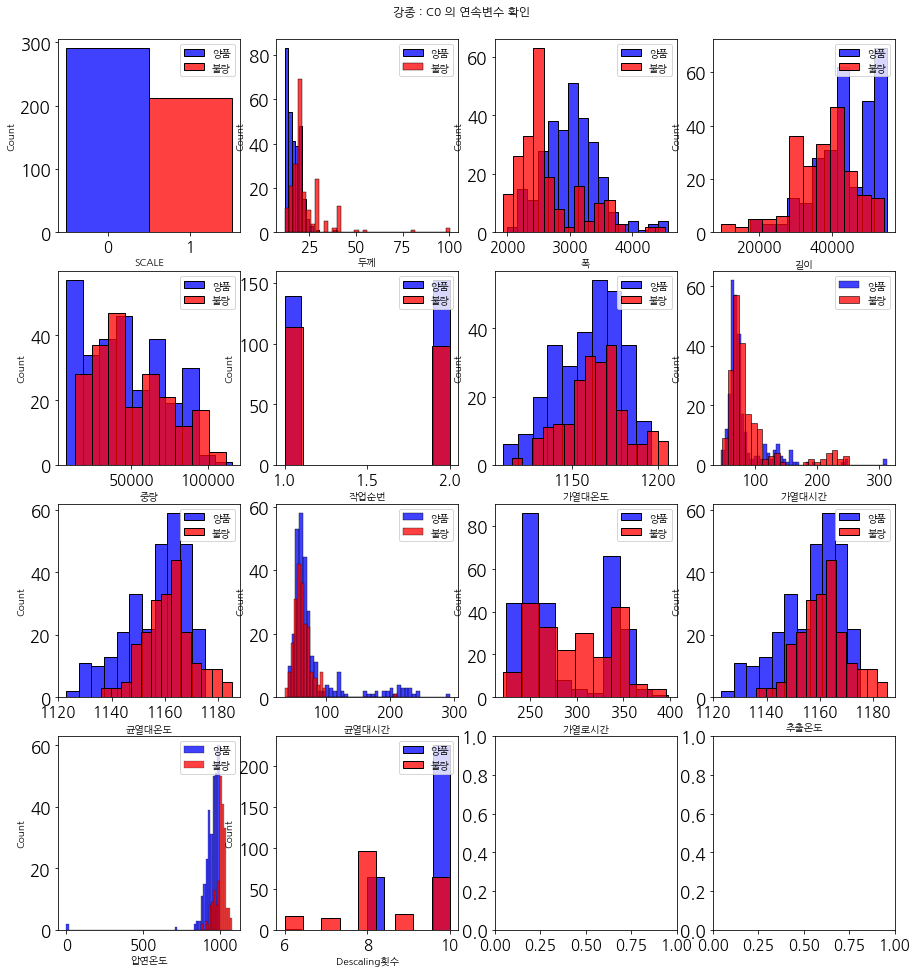

In [17]:
draw_col1(new_scale, 'C0')

C0 강종의 경우 압연온도, 디스케일링 횟수, 추출온도 가열대온도, 균열대 온도변수가 특정 값 이상에서 100% 불량을 보인다.

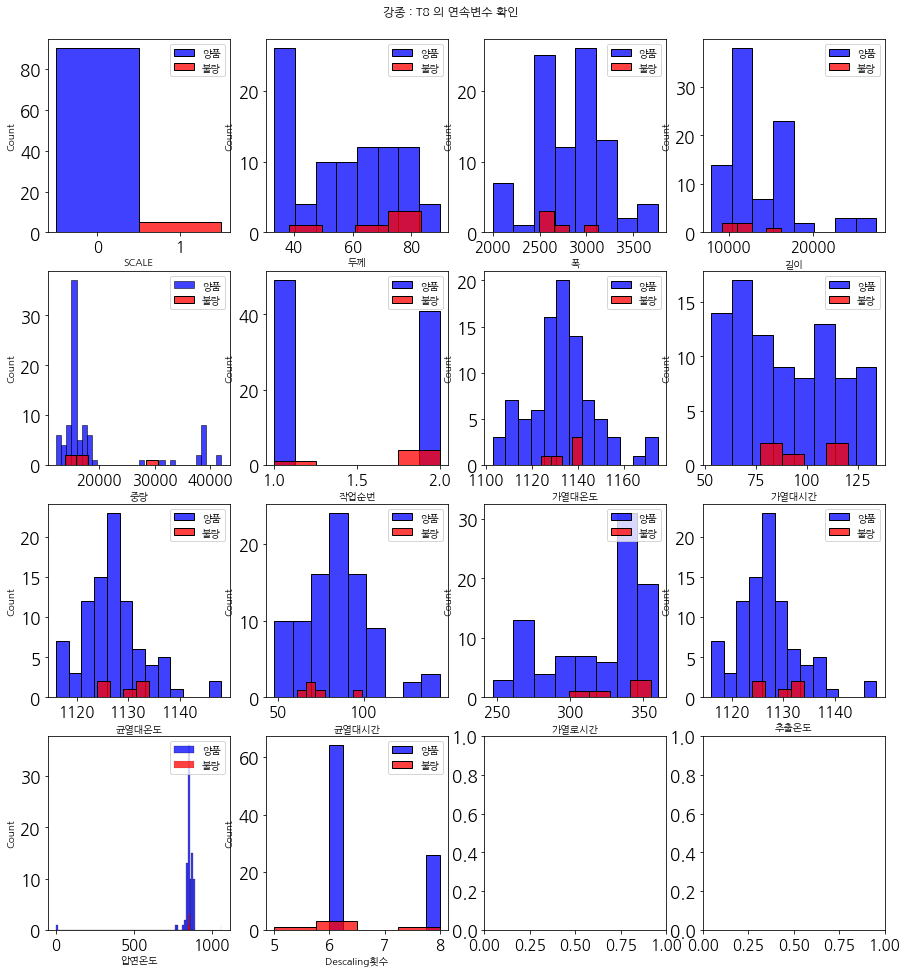

In [18]:
draw_col1(new_scale, 'T8')

T8 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

In [19]:
draw_col1(new_scale, 'T7')

T7 강종의 경우 압연온도,  균열대시간, 가열대시간 디스케일링 횟수가 핵심 변수로 보이고, C0강종과 달리 불량에 압연온도를 제외한 다른 온도변수는 크게 영향을 미치는 것 같아 보이진 않는다.  

다만 불량의 수가 적기 때문에 명확한 판단이 어려울 듯하다.

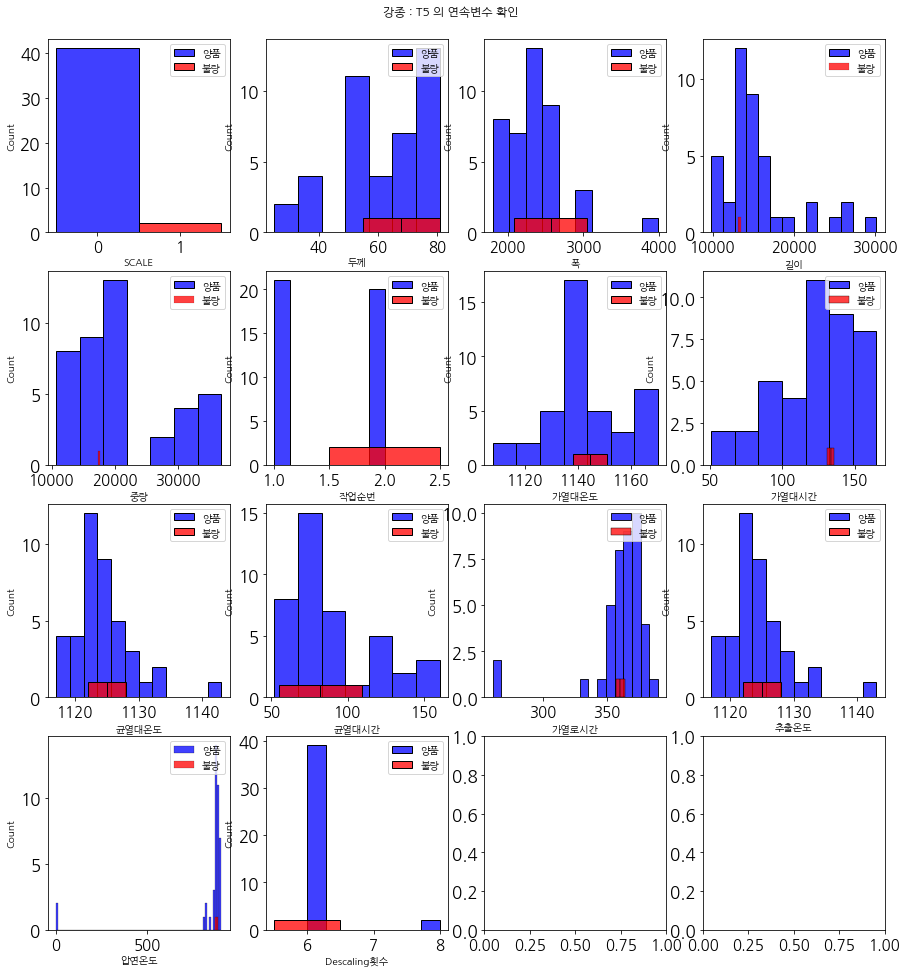

In [20]:
draw_col1(new_scale, 'T5')

T5 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

## 2-2 통계적 검증
### 1. 상관계수를 통한 연관 변수 파악
### 2. 양품과 불량품의 연속형 변수 평균값을 2 Sample T - test를 통해 유의한지 검증하겠다.
### 3. 범주형 변수별 불량률을 Chi Square- Test를 통해 유의한지 검증하겠다. 

##### 1. 상관계수를 통한 연관 변수파악

In [21]:
def check_corr(df):
    steel_kind = df['강종'].unique()
    def sk(df, i):
        sk = df[df['강종']== i]
        if len(sk) <10:
            print('데이터 부족')
        else:
            
            print('강종 :  {}  - 변수별 상관계수 '.format(i))
            display(sk.corr())
            print('-------------------------------------------------------------------------------------')
            print()
    

    for i in  steel_kind:
        sk(df, i)
    

In [22]:
check_corr(new_scale)

강종 :  T1  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.19 -0.03  0.33  0.43 -0.35   0.38   0.07   0.39  -0.23   
두께           -0.19  1.00 -0.43 -0.84 -0.51  0.16  -0.73   0.34  -0.78   0.47   
폭            -0.03 -0.43  1.00 -0.05 -0.12  0.04   0.45   0.20   0.31  -0.72   
길이            0.33 -0.84 -0.05  1.00  0.83 -0.18   0.59  -0.35   0.73  -0.26   
중량            0.43 -0.51 -0.12  0.83  1.00 -0.08   0.47  -0.09   0.58  -0.30   
작업순번         -0.35  0.16  0.04 -0.18 -0.08  1.00   0.11  -0.07   0.05   0.07   
가열대온도         0.38 -0.73  0.45  0.59  0.47  0.11   1.00  -0.24   0.96  -0.36   
가열대시간         0.07  0.34  0.20 -0.35 -0.09 -0.07  -0.24   1.00  -0.34  -0.45   
균열대온도         0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
균열대시간        -0.23  0.47 -0.72 -0.26 -0.30  0.07  -0.36  -0.45  -0.34   1.00   
가열로시간        -0.28  0.85 -0.60 -0.70 -0.59  0.05  -0.74   0.18  -0.74   0.65   
추출온도          0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
압연온도         -0.41  0.81  0.01 -0.97 -0.86  0.15  -0.69   0.35  -0.81   0.27   
Descaling횟수   0.10 -0.98  0.49  0.81  0.51 -0.11   0.71  -0.27   0.74  -0.52   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.28  0.39 -0.41         0.10  
두께            0.85 -0.78  0.81        -0.98  
폭            -0.60  0.31  0.01         0.49  
길이           -0.70  0.73 -0.97         0.81  
중량           -0.59  0.58 -0.86         0.51  
작업순번          0.05  0.05  0.15        -0.11  
가열대온도        -0.74  0.96 -0.69         0.71  
가열대시간         0.18 -0.34  0.35        -0.27  
균열대온도        -0.74  1.00 -0.81         0.74  
균열대시간         0.65 -0.34  0.27        -0.52  
가열로시간         1.00 -0.74  0.70        -0.89  
추출온도         -0.74  1.00 -0.81         0.74  
압연온도          0.70 -0.81  1.00        -0.77  
Descaling횟수  -0.89  0.74 -0.77         1.00

-------------------------------------------------------------------------------------

강종 :  T8  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.14 -0.09 -0.10 -0.01  0.15   0.05   0.07   0.09  -0.11   
두께            0.14  1.00 -0.45 -0.69 -0.03  0.03  -0.27   0.07  -0.11   0.19   
폭            -0.09 -0.45  1.00 -0.16 -0.21  0.03   0.33   0.03   0.23  -0.11   
길이           -0.10 -0.69 -0.16  1.00  0.50 -0.05  -0.03  -0.04  -0.11  -0.18   
중량           -0.01 -0.03 -0.21  0.50  1.00 -0.04  -0.25   0.08  -0.20  -0.10   
작업순번          0.15  0.03  0.03 -0.05 -0.04  1.00   0.06   0.06   0.07  -0.09   
가열대온도         0.05 -0.27  0.33 -0.03 -0.25  0.06   1.00   0.06   0.79  -0.33   
가열대시간         0.07  0.07  0.03 -0.04  0.08  0.06   0.06   1.00   0.07  -0.69   
균열대온도         0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
균열대시간        -0.11  0.19 -0.11 -0.18 -0.10 -0.09  -0.33  -0.69  -0.29   1.00   
가열로시간         0.08  0.59 -0.32 -0.37  0.14  0.10  -0.39   0.23  -0.17   0.22   
추출온도          0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
압연온도          0.11 -0.15 -0.11  0.13 -0.21 -0.09   0.11  -0.00   0.03  -0.02   
Descaling횟수  -0.09 -0.78  0.50  0.43 -0.24 -0.03   0.41  -0.03   0.18  -0.21   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.08  0.09  0.11        -0.09  
두께            0.59 -0.11 -0.15        -0.78  
폭            -0.32  0.23 -0.11         0.50  
길이           -0.37 -0.11  0.13         0.43  
중량            0.14 -0.20 -0.21        -0.24  
작업순번          0.10  0.07 -0.09        -0.03  
가열대온도        -0.39  0.79  0.11         0.41  
가열대시간         0.23  0.07 -0.00        -0.03  
균열대온도        -0.17  1.00  0.03         0.18  
균열대시간         0.22 -0.29 -0.02        -0.21  
가열로시간         1.00 -0.17 -0.18        -0.82  
추출온도         -0.17  1.00  0.03         0.18  
압연온도         -0.18  0.03  1.00         0.24  
Descaling횟수  -0.82  0.18  0.24         1.00

-------------------------------------------------------------------------------------

강종 :  T0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.27  0.28  0.17  0.01  0.15   0.38  -0.30   0.46  -0.26   
두께           -0.27  1.00 -0.22 -0.84  0.00 -0.10  -0.13   0.57  -0.54   0.72   
폭             0.28 -0.22  1.00 -0.28 -0.07 -0.14   0.18  -0.40   0.30  -0.13   
길이            0.17 -0.84 -0.28  1.00  0.12  0.25   0.02  -0.43   0.36  -0.57   
중량            0.01  0.00 -0.07  0.12  1.00 -0.05   0.16  -0.13   0.18   0.04   
작업순번          0.15 -0.10 -0.14  0.25 -0.05  1.00  -0.01   0.05  -0.15   0.15   
가열대온도         0.38 -0.13  0.18  0.02  0.16 -0.01   1.00  -0.40   0.81  -0.02   
가열대시간        -0.30  0.57 -0.40 -0.43 -0.13  0.05  -0.40   1.00  -0.56   0.37   
균열대온도         0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
균열대시간        -0.26  0.72 -0.13 -0.57  0.04  0.15  -0.02   0.37  -0.52   1.00   
가열로시간        -0.40  0.78 -0.29 -0.64 -0.12 -0.05  -0.55   0.81  -0.83   0.64   
추출온도          0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
압연온도          0.07 -0.14  0.11  0.13 -0.06  0.20   0.30  -0.18   0.26   0.12   
Descaling횟수   0.03 -0.92  0.24  0.73 -0.29  0.05   0.03  -0.52   0.43  -0.66   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.40  0.46  0.07         0.03  
두께            0.78 -0.54 -0.14        -0.92  
폭            -0.29  0.30  0.11         0.24  
길이           -0.64  0.36  0.13         0.73  
중량           -0.12  0.18 -0.06        -0.29  
작업순번         -0.05 -0.15  0.20         0.05  
가열대온도        -0.55  0.81  0.30         0.03  
가열대시간         0.81 -0.56 -0.18        -0.52  
균열대온도        -0.83  1.00  0.26         0.43  
균열대시간         0.64 -0.52  0.12        -0.66  
가열로시간         1.00 -0.83 -0.39        -0.69  
추출온도         -0.83  1.00  0.26         0.43  
압연온도         -0.39  0.26  1.00         0.18  
Descaling횟수  -0.69  0.43  0.18         1.00

-------------------------------------------------------------------------------------

강종 :  T5  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.10  0.13 -0.11 -0.11  0.22   0.02   0.08   0.02  -0.06   
두께            0.10  1.00 -0.15 -0.59 -0.42 -0.02  -0.55   0.34  -0.38  -0.54   
폭             0.13 -0.15  1.00 -0.39  0.05 -0.21  -0.17   0.10  -0.08   0.14   
길이           -0.11 -0.59 -0.39  1.00  0.66  0.10   0.23  -0.41   0.48   0.11   
중량           -0.11 -0.42  0.05  0.66  1.00  0.11   0.05  -0.27   0.14   0.28   
작업순번          0.22 -0.02 -0.21  0.10  0.11  1.00   0.26   0.02   0.17   0.23   
가열대온도         0.02 -0.55 -0.17  0.23  0.05  0.26   1.00  -0.05   0.23   0.62   
가열대시간         0.08  0.34  0.10 -0.41 -0.27  0.02  -0.05   1.00  -0.23  -0.21   
균열대온도         0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
균열대시간        -0.06 -0.54  0.14  0.11  0.28  0.23   0.62  -0.21  -0.22   1.00   
가열로시간        -0.00  0.71  0.21 -0.73 -0.29 -0.01  -0.30   0.55  -0.61  -0.06   
추출온도          0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
압연온도          0.05 -0.28  0.12  0.10  0.11  0.02   0.23   0.32   0.03   0.28   
Descaling횟수  -0.05 -0.52 -0.25  0.63  0.16 -0.01   0.10  -0.56   0.66  -0.15   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.00  0.02  0.05        -0.05  
두께            0.71 -0.38 -0.28        -0.52  
폭             0.21 -0.08  0.12        -0.25  
길이           -0.73  0.48  0.10         0.63  
중량           -0.29  0.14  0.11         0.16  
작업순번         -0.01  0.17  0.02        -0.01  
가열대온도        -0.30  0.23  0.23         0.10  
가열대시간         0.55 -0.23  0.32        -0.56  
균열대온도        -0.61  1.00  0.03         0.66  
균열대시간        -0.06 -0.22  0.28        -0.15  
가열로시간         1.00 -0.61 -0.04        -0.91  
추출온도         -0.61  1.00  0.03         0.66  
압연온도         -0.04  0.03  1.00        -0.02  
Descaling횟수  -0.91  0.66 -0.02         1.00

-------------------------------------------------------------------------------------

강종 :  C0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.41 -0.37 -0.35  0.09 -0.06   0.11   0.11   0.21  -0.22   
두께            0.41  1.00 -0.28 -0.67  0.03 -0.01  -0.19   0.05  -0.08  -0.16   
폭            -0.37 -0.28  1.00 -0.02 -0.06  0.02   0.10  -0.09   0.10   0.12   
길이           -0.35 -0.67 -0.02  1.00  0.09 -0.04   0.12   0.08  -0.06   0.20   
중량            0.09  0.03 -0.06  0.09  1.00 -0.03  -0.16   0.10  -0.05  -0.13   
작업순번         -0.06 -0.01  0.02 -0.04 -0.03  1.00  -0.04  -0.02  -0.01   0.05   
가열대온도         0.11 -0.19  0.10  0.12 -0.16 -0.04   1.00  -0.09   0.79  -0.19   
가열대시간         0.11  0.05 -0.09  0.08  0.10 -0.02  -0.09   1.00  -0.18   0.24   
균열대온도         0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
균열대시간        -0.22 -0.16  0.12  0.20 -0.13  0.05  -0.19   0.24  -0.52   1.00   
가열로시간         0.09  0.00 -0.36  0.19  0.18  0.02  -0.18   0.45  -0.31   0.44   
추출온도          0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
압연온도          0.39  0.38 -0.27 -0.33  0.08 -0.02  -0.03   0.10   0.07  -0.21   
Descaling횟수  -0.46 -0.71  0.27  0.58 -0.19  0.04   0.18  -0.03   0.05   0.17   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.09  0.21  0.39        -0.46  
두께            0.00 -0.08  0.38        -0.71  
폭            -0.36  0.10 -0.27         0.27  
길이            0.19 -0.06 -0.33         0.58  
중량            0.18 -0.05  0.08        -0.19  
작업순번          0.02 -0.01 -0.02         0.04  
가열대온도        -0.18  0.79 -0.03         0.18  
가열대시간         0.45 -0.18  0.10        -0.03  
균열대온도        -0.31  1.00  0.07         0.05  
균열대시간         0.44 -0.52 -0.21         0.17  
가열로시간         1.00 -0.31  0.05        -0.01  
추출온도         -0.31  1.00  0.07         0.05  
압연온도          0.05  0.07  1.00        -0.40  
Descaling횟수  -0.01  0.05 -0.40         1.00

-------------------------------------------------------------------------------------

데이터 부족
데이터 부족
강종 :  T7  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.23  0.01 -0.16 -0.24  0.06  -0.15   0.16  -0.15   0.26   
두께            0.23  1.00 -0.50 -0.81 -0.39 -0.06  -0.60   0.02  -0.23   0.71   
폭             0.01 -0.50  1.00  0.14  0.16  0.15   0.34   0.05   0.17  -0.45   
길이           -0.16 -0.81  0.14  1.00  0.48 -0.09   0.58   0.01   0.22  -0.56   
중량           -0.24 -0.39  0.16  0.48  1.00 -0.20   0.35  -0.04   0.01  -0.24   
작업순번          0.06 -0.06  0.15 -0.09 -0.20  1.00   0.10  -0.26   0.20  -0.13   
가열대온도        -0.15 -0.60  0.34  0.58  0.35  0.10   1.00  -0.04   0.64  -0.65   
가열대시간         0.16  0.02  0.05  0.01 -0.04 -0.26  -0.04   1.00  -0.49   0.10   
균열대온도        -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
균열대시간         0.26  0.71 -0.45 -0.56 -0.24 -0.13  -0.65   0.10  -0.62   1.00   
가열로시간         0.24  0.56 -0.32 -0.52 -0.33 -0.19  -0.63   0.54  -0.70   0.79   
추출온도         -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
압연온도          0.32 -0.22  0.23  0.30 -0.12  0.03   0.29   0.06   0.35  -0.45   
Descaling횟수  -0.27 -0.40  0.23  0.40  0.07  0.17   0.51  -0.49   0.73  -0.61   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.24 -0.15  0.32        -0.27  
두께            0.56 -0.23 -0.22        -0.40  
폭            -0.32  0.17  0.23         0.23  
길이           -0.52  0.22  0.30         0.40  
중량           -0.33  0.01 -0.12         0.07  
작업순번         -0.19  0.20  0.03         0.17  
가열대온도        -0.63  0.64  0.29         0.51  
가열대시간         0.54 -0.49  0.06        -0.49  
균열대온도        -0.70  1.00  0.35         0.73  
균열대시간         0.79 -0.62 -0.45        -0.61  
가열로시간         1.00 -0.70 -0.33        -0.66  
추출온도         -0.70  1.00  0.35         0.73  
압연온도         -0.33  0.35  1.00         0.45  
Descaling횟수  -0.66  0.73  0.45         1.00

-------------------------------------------------------------------------------------

데이터 부족


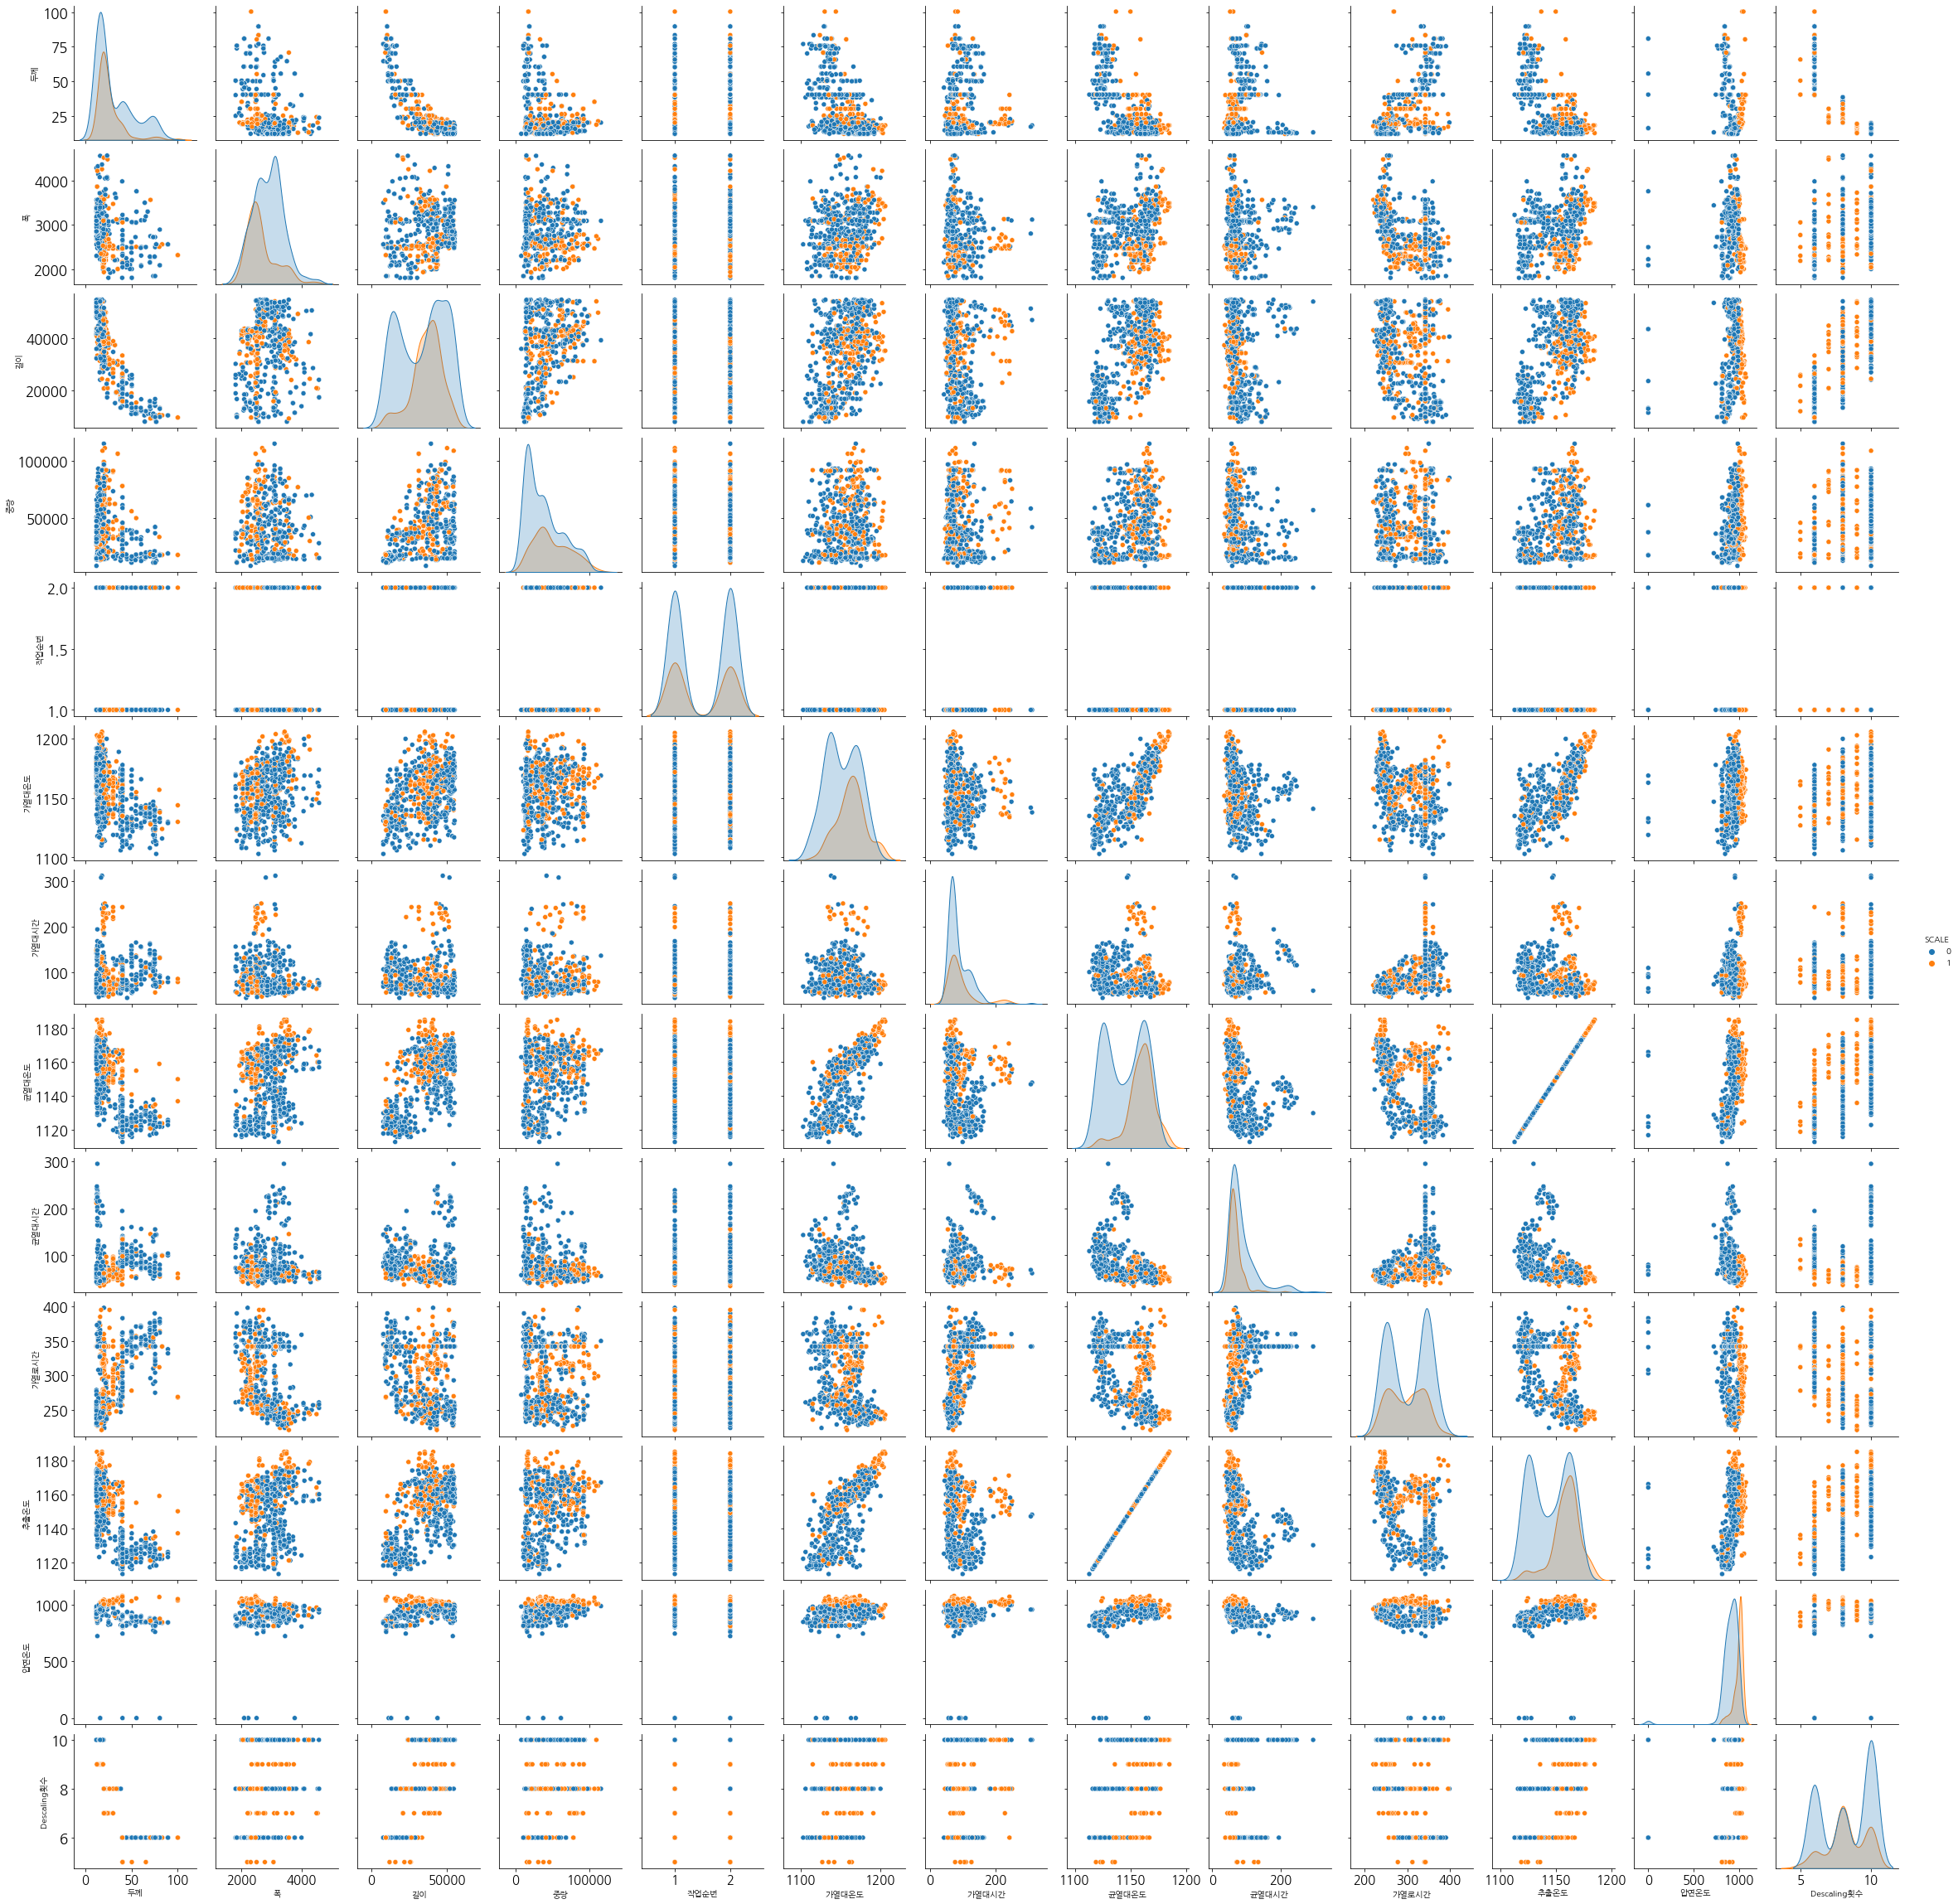

In [23]:
sns.pairplot(new_scale, hue = 'SCALE')

균열대 온도 제거 

####  2. Sample T -test 
##### 양품과 불량의 변수별 평균 비교

##### 2-1 각 변수들 정규성 테스트

In [24]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

### IQR을 이용한 이상치 제거 

In [25]:
scale['SCALE'] =scale['SCALE'].astype('object')
scale['HSB'] = scale['HSB'].astype('object')

In [26]:
def slicing(df, steel_kind):
    df =df[df['STEEL_KIND']==steel_kind]
    return df

def del_outlier(df, columns):
    
    des = df[columns].describe()
    iqr =des[6]-des[4]

    high = iqr*1.5 + des[6]
    low = des[4] -iqr*1.5 
#     print(high, low)
    df1 = df[(df[columns] > low) & (df[columns] < high)]
    return df1

def cal_iqr(df):
    df = df.select_dtypes(exclude ='object')
    for i in df.columns:
        des =df[i].describe()
        iqr =des[6]-des[4]
        high = iqr*1.5 + des[6]
        low = des[4] -iqr*1.5
        print(f'변수 {i} : high : {high} , low : {low} , iqr : {iqr}')
        
def make_df(df):
    df1 = del_outlier(df, 'PT_THK')
    df2 =  del_outlier(df1, 'PT_WDTH')
    df3 =  del_outlier(df2, 'PT_LTH')
    df4 =  del_outlier(df3, 'PT_WDTH')
    df5 =  del_outlier(df4, 'FUR_HZ_TEMP')
    df6 =  del_outlier(df5, 'FUR_HZ_TIME')
    df7 =  del_outlier(df6, 'FUR_SZ_TEMP')
    df8 =  del_outlier(df7, 'FUR_SZ_TIME')
    df9 =  del_outlier(df8, 'FUR_TIME')
    df10 =  del_outlier(df9, 'FUR_EXTEMP')
    df11 =  del_outlier(df10, 'ROLLING_TEMP_T5')
    return df11

In [27]:
c0 =slicing(scale, 'C0')
t7 = slicing(scale, 'T7')
t8 = slicing(scale, 'T8') 
t5 = slicing(scale, 'T5') 

In [28]:
c0.describe()

PT_THK  PT_WDTH   PT_LTH    PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  \
count  503.00   503.00   503.00    503.00       503.00       503.00   
mean    19.54  2878.11 41319.79  48579.50      1161.81        86.00   
std      8.55   520.27  8976.80  25082.52        18.48        40.95   
min     12.03  1929.00  9547.00   7820.00      1110.00        45.00   
25%     15.08  2489.00 35999.50  29230.00      1149.00        64.00   
50%     18.11  2800.00 41967.00  42870.00      1164.00        72.00   
75%     20.30  3265.00 49066.50  66570.00      1174.00        88.00   
max    100.34  4575.00 54917.00 115080.00      1206.00       312.00   

       FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       503.00       503.00    503.00      503.00           503.00  
mean       1158.73        74.09    290.54     1158.73           969.73  
std          10.97        39.17     44.79       10.97            75.84  
min        1123.00        35.00    221.00     1123.00             0.00  
25%        1153.00        56.00    251.00     1153.00           942.50  
50%        1160.00        62.00    272.00     1160.00           977.00  
75%        1166.00        73.00    342.00     1166.00          1006.00  
max        1185.00       294.00    398.00     1185.00          1078.00

In [29]:
cal_iqr(c0)

변수 PT_THK : high : 28.1425 , low : 7.242500000000001 , iqr : 5.225
변수 PT_WDTH : high : 4429.0 , low : 1325.0 , iqr : 776.0
변수 PT_LTH : high : 68667.0 , low : 16399.0 , iqr : 13067.0
변수 PT_WGT : high : 122580.0 , low : -26780.0 , iqr : 37340.0
변수 FUR_HZ_TEMP : high : 1211.5 , low : 1111.5 , iqr : 25.0
변수 FUR_HZ_TIME : high : 124.0 , low : 28.0 , iqr : 24.0
변수 FUR_SZ_TEMP : high : 1185.5 , low : 1133.5 , iqr : 13.0
변수 FUR_SZ_TIME : high : 98.5 , low : 30.5 , iqr : 17.0
변수 FUR_TIME : high : 478.5 , low : 114.5 , iqr : 91.0
변수 FUR_EXTEMP : high : 1185.5 , low : 1133.5 , iqr : 13.0
변수 ROLLING_TEMP_T5 : high : 1101.25 , low : 847.25 , iqr : 63.5


In [30]:
c0 = make_df(c0)
t5 = make_df(t5)
t7 = make_df(t7)
t8 = make_df(t8)

In [31]:
c0.describe()

PT_THK  PT_WDTH   PT_LTH    PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  \
count  345.00   345.00   345.00    345.00       345.00       345.00   
mean    17.67  2883.34 42478.47  47974.99      1165.80        72.48   
std      3.50   508.42  7571.36  24447.47        17.96        14.78   
min     12.03  1929.00 20723.00   7820.00      1112.00        45.00   
25%     15.08  2520.00 37250.00  28580.00      1154.00        63.00   
50%     18.10  2800.00 42327.00  43020.00      1169.00        70.00   
75%     20.10  3264.00 49195.00  66250.00      1177.00        78.00   
max     26.24  4373.00 54917.00 111200.00      1206.00       121.00   

       FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       345.00       345.00    345.00      345.00           345.00  
mean       1162.30        61.92    278.48     1162.30           971.59  
std           8.48        10.13     42.87        8.48            36.74  
min        1141.00        40.00    221.00     1141.00           877.00  
25%        1157.00        55.00    245.00     1157.00           947.00  
50%        1163.00        61.00    260.00     1163.00           976.00  
75%        1168.00        68.00    316.00     1168.00           999.00  
max        1184.00        89.00    398.00     1184.00          1044.00

In [32]:
cal_iqr(c0)

변수 PT_THK : high : 27.630000000000003 , low : 7.549999999999998 , iqr : 5.020000000000001
변수 PT_WDTH : high : 4380.0 , low : 1404.0 , iqr : 744.0
변수 PT_LTH : high : 67112.5 , low : 19332.5 , iqr : 11945.0
변수 PT_WGT : high : 122755.0 , low : -27925.0 , iqr : 37670.0
변수 FUR_HZ_TEMP : high : 1211.5 , low : 1119.5 , iqr : 23.0
변수 FUR_HZ_TIME : high : 100.5 , low : 40.5 , iqr : 15.0
변수 FUR_SZ_TEMP : high : 1184.5 , low : 1140.5 , iqr : 11.0
변수 FUR_SZ_TIME : high : 87.5 , low : 35.5 , iqr : 13.0
변수 FUR_TIME : high : 422.5 , low : 138.5 , iqr : 71.0
변수 FUR_EXTEMP : high : 1184.5 , low : 1140.5 , iqr : 11.0
변수 ROLLING_TEMP_T5 : high : 1077.0 , low : 869.0 , iqr : 52.0


In [33]:
def check_norm(df,steel_kind, al):
    from scipy.stats import shapiro
    import scipy.stats as stats
    df = df[df['STEEL_KIND']== steel_kind]
    no = df[df['SCALE']== 0]
    pro =df[df['SCALE']== 1] 
    def draw_qqplot(df, i):
        if is_object_dtype(df[i]) == False:
            if al != 'all':
                fig, ax =plt.subplots(2,3, figsize =(20,8))
                sns.histplot(data = no , x = i ,kde=True,color = 'r' ,ax= ax[0,0], label = '양품')
                stats.probplot(no[i], plot = ax[0,1])
                sns.boxplot(no[i] , ax = ax[0,2])


                sns.histplot(data = pro , x = i ,kde=True,color = 'b' ,ax= ax[1,0], label ='불량')
                stats.probplot(pro[i], plot = ax[1,1])
                sns.boxplot(pro[i] , ax = ax[1,2])
                print(fig)
            elif al == 'all':
                fig, ax =plt.subplots(1,3, figsize =(20,8))
                sns.histplot(data = df , x = i ,kde=True,color = 'r' ,ax= ax[0], label = '양품')
                stats.probplot(df[i], plot = ax[1])
                sns.boxplot(df[i] , ax = ax[2])
        
        
    def normal_test(df, i):            
        if is_object_dtype(df[i]) == False:
            stats , pval = shapiro(df[i])
            print(' 샤피로 : 검정 통계량 : {}, p_values : {}'.format(stats, pval))
            if pval < 0.05:
                print(" 샤피로 : P_value : {}로 변수 {}는 정규성을 가지지 않는다.".format(pval,i))

            elif pval > 0.05:
                print(" 샤피로 :  P_value : {}로 변수 {}는 정규성을 가진다.".format(pval,i))
    for i in df.columns:
        draw_qqplot(df, i)
        plt.show()
        normal_test(df, i)
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


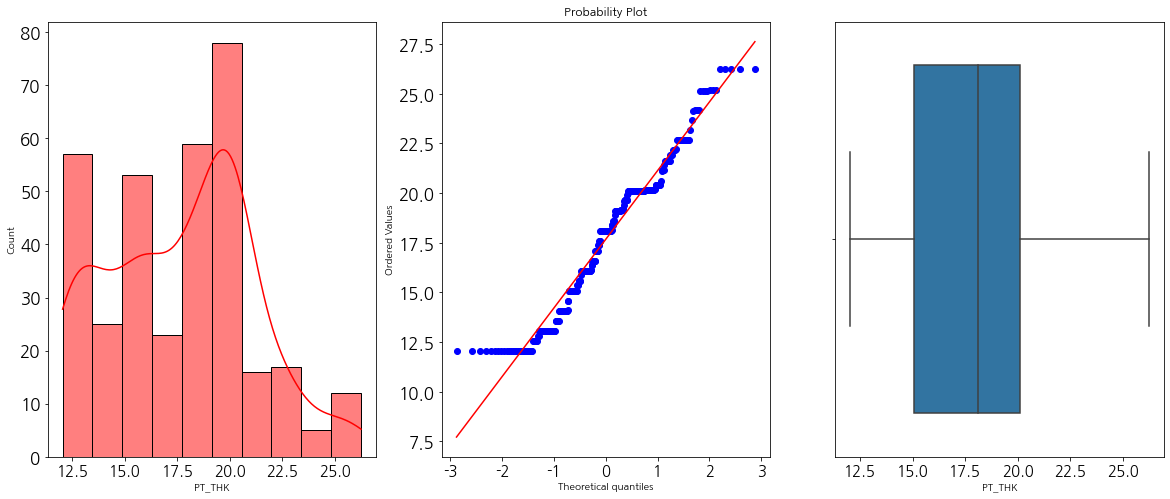

 샤피로 : 검정 통계량 : 0.9615253210067749, p_values : 7.01759148569181e-08
 샤피로 : P_value : 7.01759148569181e-08로 변수 PT_THK는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 샤피로 : 검정 통계량 : 0.9734528660774231, p_values : 5.722070454794448e-06
 샤피로 : P_value : 5.722070454794448e-06로 변수 PT_WDTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 샤피로 : 검정 통계량 : 0.9686392545700073, p_values : 8.691848734088126e-07
 샤피로 : P_value : 8.691848734088126e-07로 변수 PT_LTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


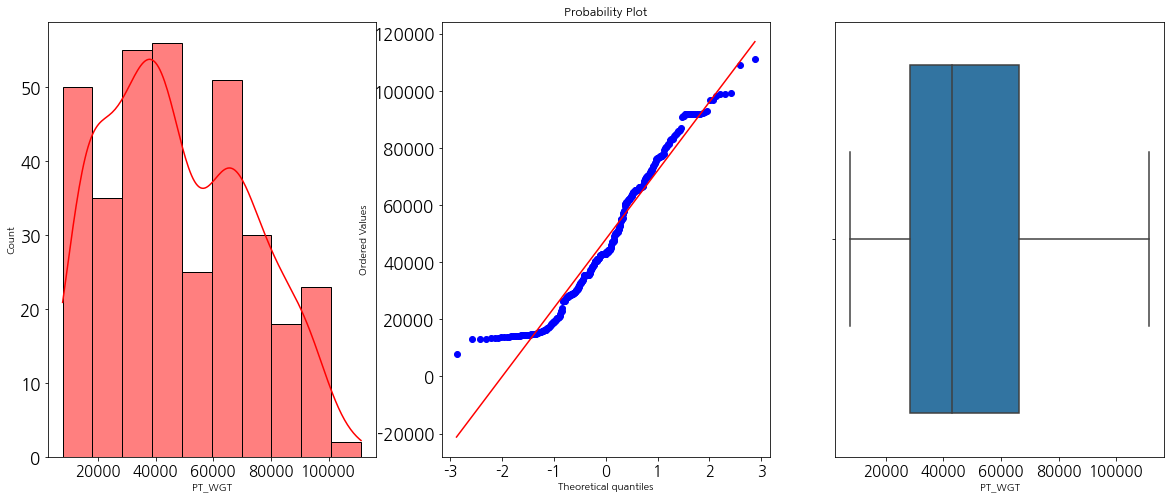

 샤피로 : 검정 통계량 : 0.9544094800949097, p_values : 7.317206396351139e-09
 샤피로 : P_value : 7.317206396351139e-09로 변수 PT_WGT는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


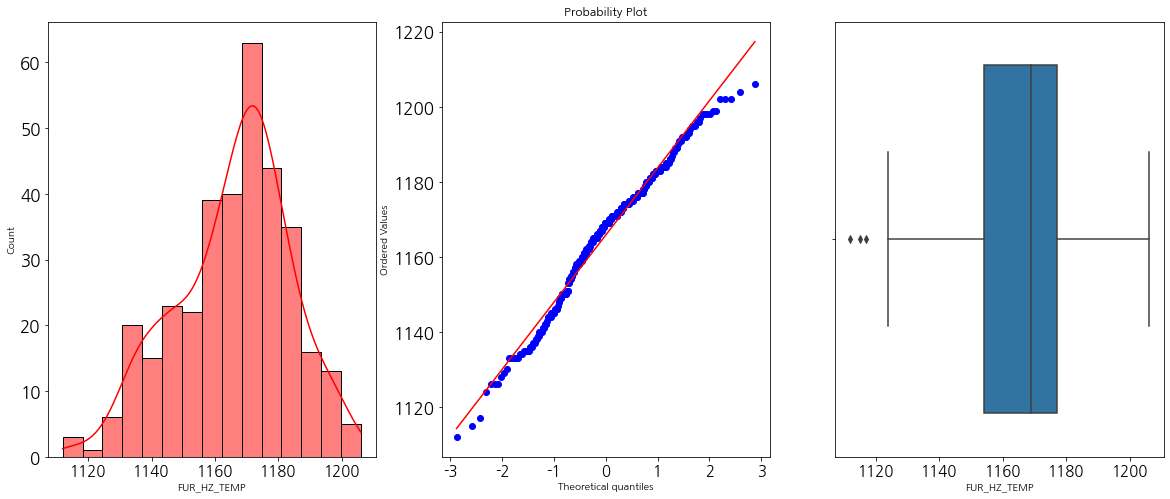

 샤피로 : 검정 통계량 : 0.982295572757721, p_values : 0.0003010885848198086
 샤피로 : P_value : 0.0003010885848198086로 변수 FUR_HZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


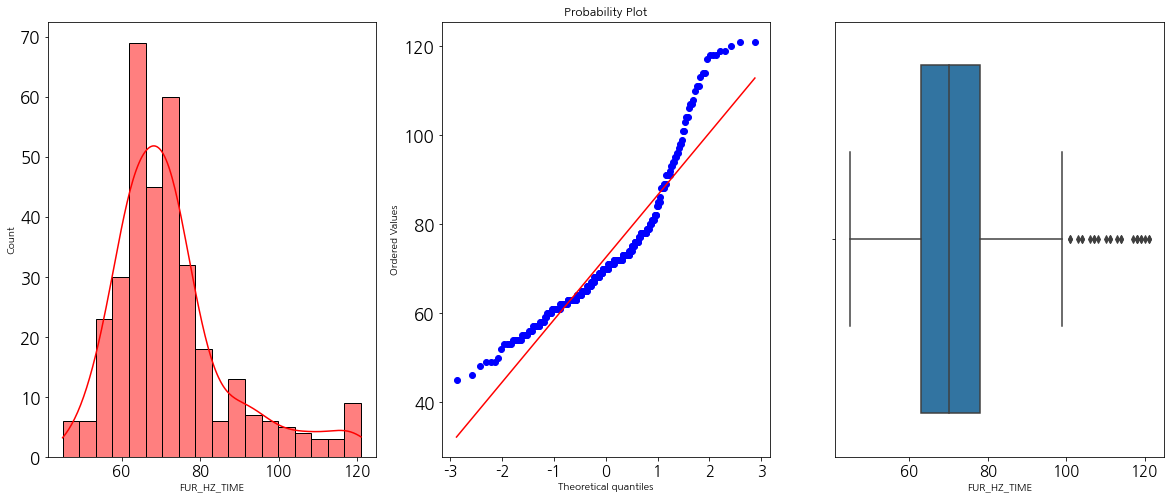

 샤피로 : 검정 통계량 : 0.8897112607955933, p_values : 4.476411578110788e-15
 샤피로 : P_value : 4.476411578110788e-15로 변수 FUR_HZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


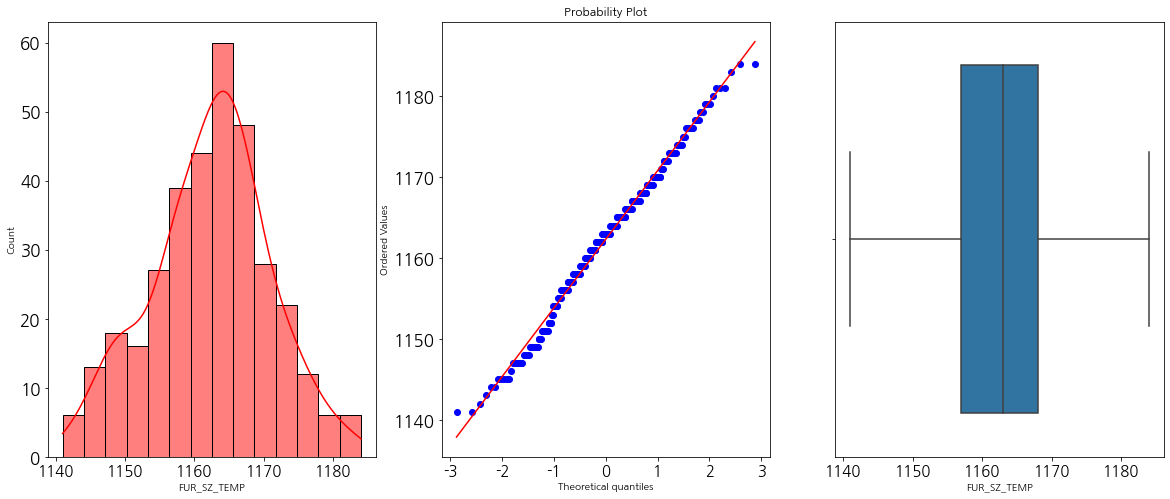

 샤피로 : 검정 통계량 : 0.9909735321998596, p_values : 0.03297509625554085
 샤피로 : P_value : 0.03297509625554085로 변수 FUR_SZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 샤피로 : 검정 통계량 : 0.9834964275360107, p_values : 0.0005479821120388806
 샤피로 : P_value : 0.0005479821120388806로 변수 FUR_SZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 샤피로 : 검정 통계량 : 0.857543408870697, p_values : 3.186976684167576e-17
 샤피로 : P_value : 3.186976684167576e-17로 변수 FUR_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


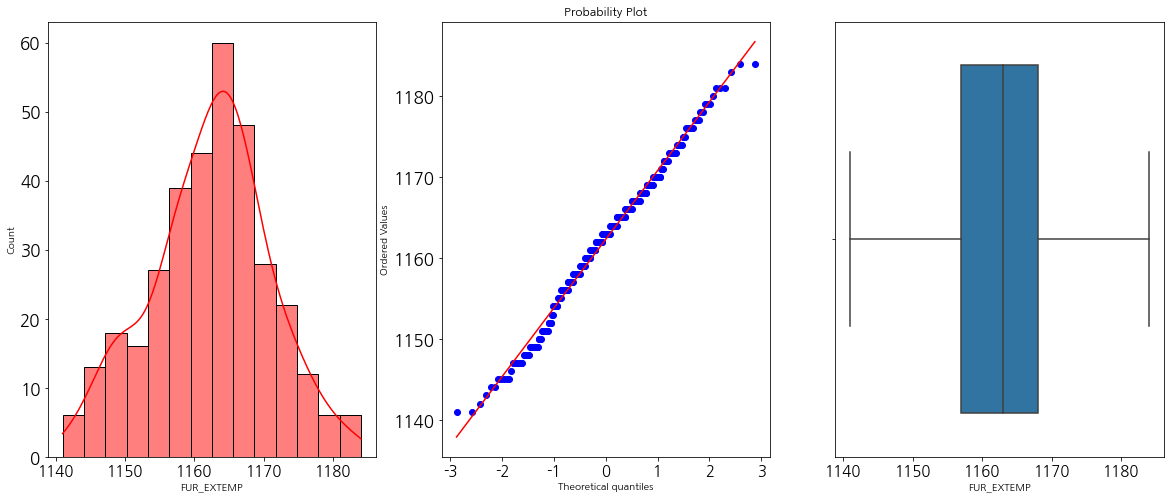

 샤피로 : 검정 통계량 : 0.9909735321998596, p_values : 0.03297509625554085
 샤피로 : P_value : 0.03297509625554085로 변수 FUR_EXTEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


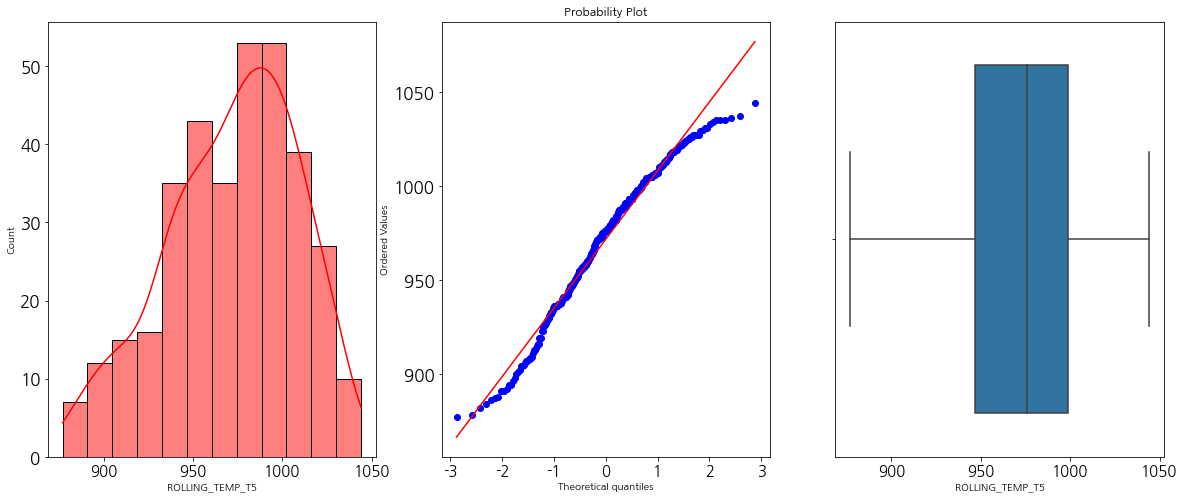

 샤피로 : 검정 통계량 : 0.975866436958313, p_values : 1.572728251630906e-05
 샤피로 : P_value : 1.572728251630906e-05로 변수 ROLLING_TEMP_T5는 정규성을 가지지 않는다.


In [34]:
check_norm(c0, 'C0', 'all')

In [35]:
def t_test(df):
    from scipy import stats
#     df['두께'] = df['두께'].astype('int32')
#     df.drop('폭',axis = 1 , inplace =True)
#     df.drop('길이',axis = 1 , inplace =True)
    col = df.select_dtypes(exclude ='object').columns
    col_list = []
    for i in col:
        if i =='SCALE':
            continue
        else:
            pro = df[df['SCALE']== 1][i]
            no = df[df['SCALE']== 0][i]
#             print(i)
#             display(df.info())
            t_result = stats.ttest_ind(pro, no)
            print('--------------------- 2 Sample T-test result ----------------------------')
            print()
            df.boxplot(column = i ,by = 'SCALE' ,figsize = (7,7))
            plt.show()
            print()
            print('귀무 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하지 않다'.format(i))
            print('대립 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하다.'.format(i))
            print()
            pval = t_result.pvalue
            print(' P-value : {}'.format(pval))
            print()
            if pval< 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가진다.'.format(i))
                print()
                col_list.append(i)
            elif pval > 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가지지 않는다.'.format(i))
                print()
    print('유의수준 0.05 에서 양품과 불량의 차이가 유의한 변수 리스트 ')
    print(col_list)
            



--------------------- 2 Sample T-test result ----------------------------



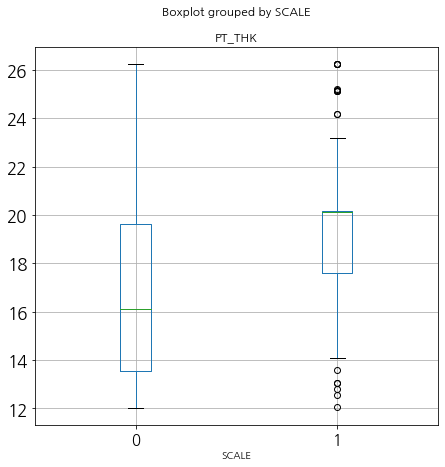


귀무 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.2644776160690611e-12

PT_THK는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



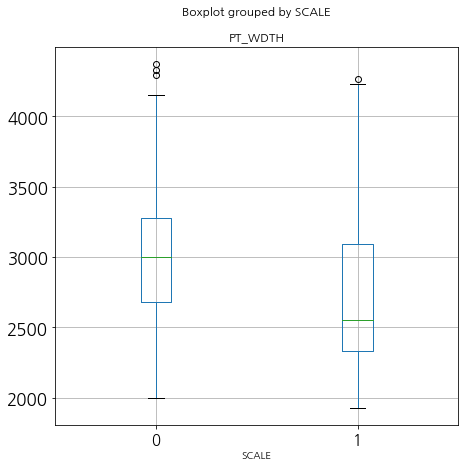


귀무 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.519242131517203e-07

PT_WDTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



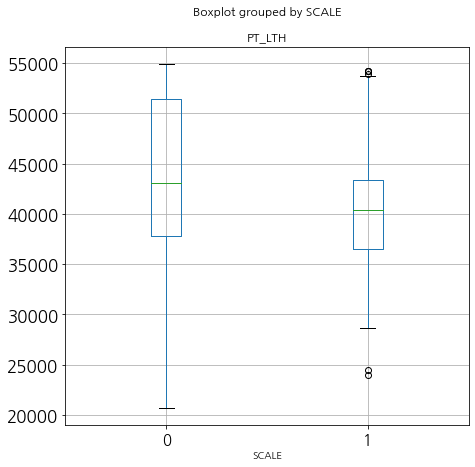


귀무 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.00010208648166453952

PT_LTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------




귀무 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.008310910382679197

PT_WGT는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------




귀무 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.05035317158950681

FUR_HZ_TEMP는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------




귀무 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.015298227449247595

FUR_HZ_TIME는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



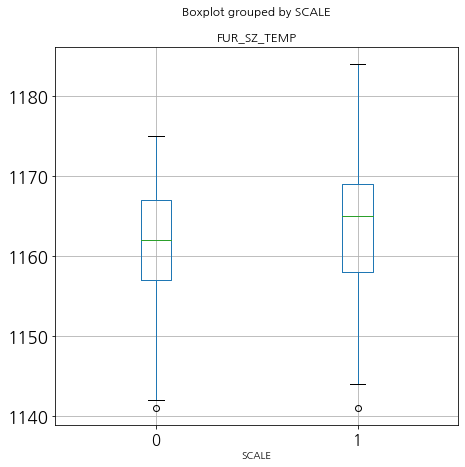


귀무 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.004543700586019397

FUR_SZ_TEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



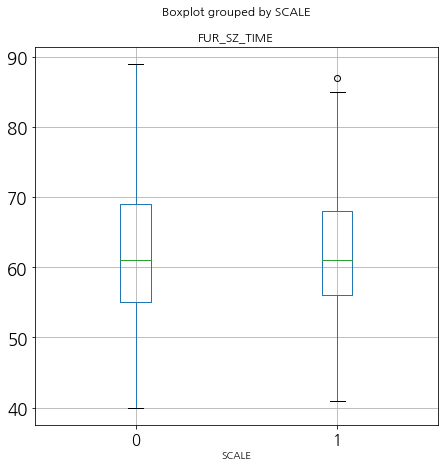


귀무 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.30924298112724313

FUR_SZ_TIME는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------




귀무 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 4.260059423315222e-05

FUR_TIME는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



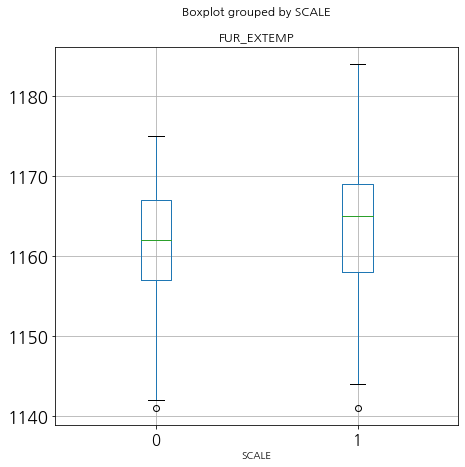


귀무 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.004543700586019397

FUR_EXTEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------




귀무 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하다.

 P-value : 7.911539193242334e-21

ROLLING_TEMP_T5는 유의수준 0.05에서 유의한 차이를 가진다.

유의수준 0.05 에서 양품과 불량의 차이가 유의한 변수 리스트 
['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']


In [36]:
t_test(c0)

### 2 sample T- test result (연속형 변수)  

#### -------------유의 수준 0.05 에서 유의한 차이를 보인 변수 ------------------  

#### 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  

#### 위의 변수를 불량의 원인을 주는 잠재적 Vital few 선정하고,  불량 예측모델에 반영하겠다.


In [37]:
def chisqure_test(df):
    from scipy.stats import chi2_contingency
    df = df.select_dtypes('object')
    col_list = []
    for columns in df.columns:
        if columns == 'SCALE':
            continue
            
        else:    
            chi1 = pd.crosstab(index = df['SCALE'], columns =df[columns] ).T
            chi =pd.crosstab(index = df['SCALE'], columns =df[columns] )
            chi1['ratio'] =(chi1[1] /(chi1[0] +chi1[1]))*100
            chi_res = chi2_contingency(chi)
            print('-------------------Chi_square Test Result ----------------------')
            print()
            print('대상 Column : {}'.format(columns))
            print()
            print('목적 : 동질성 검증')
            print()
            display(chi1.T)
            print()
            print('귀무가설  - columns : {} 의 그룹별 불량율은 서로 유의하지 않다.'.format(columns))
            print('대립가설  - columns : {} 의 그룹별 불량율은 서로 유의하다.'.format(columns))
            print()
            if chi_res[1] < 0.05:
                print('{} 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.'.format(columns))
                print()
                print('P_value : {}'.format(chi_res[1]))
                print()
                col_list.append(columns)
            elif chi_res[1] > 0.05:
                print('{} 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.'.format(columns))
                print()
                print('P_value : {}'.format(chi_res[1]))
    print()
    print('유의한 변수 list')
    print(col_list)

In [38]:
chisqure_test(scale)

-------------------Chi_square Test Result ----------------------

대상 Column : SPEC

목적 : 동질성 검증



SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
0             0.00    1.00     1.00     1.00  3.00     4.00  3.00        2.00   
1             1.00    5.00     1.00     0.00  4.00     1.00  3.00        0.00   
ratio       100.00   83.33    50.00     0.00 57.14    20.00 50.00        0.00   

SPEC   AB/EH36-TM  API-2W-50T  ...  NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                          ...                                          
0           16.00        2.00  ...       2.00       2.00  1.00       4.00   
1            1.00        0.00  ...       1.00       0.00  2.00       0.00   
ratio        5.88        0.00  ...      33.33       0.00 66.67       0.00   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
0           4.00       2.00       5.00       38.00    11.00     3.00  
1           1.00       0.00       0.00        2.00    10.00     1.00  
ratio      20.00       0.00       0.00        5.00    47.62    25.00  

[3 rows x 66 columns]


귀무가설  - columns : SPEC 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : SPEC 의 그룹별 불량율은 서로 유의하다.

SPEC 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 2.2423259331578305e-17

-------------------Chi_square Test Result ----------------------

대상 Column : STEEL_KIND

목적 : 동질성 검증



STEEL_KIND     C0     C1    C3    T0    T1   T3    T5    T7    T8
SCALE                                                            
0          291.00   0.00  6.00 14.00 16.00 2.00 41.00 29.00 90.00
1          212.00   1.00  1.00  2.00  2.00 0.00  2.00  6.00  5.00
ratio       42.15 100.00 14.29 12.50 11.11 0.00  4.65 17.14  5.26


귀무가설  - columns : STEEL_KIND 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : STEEL_KIND 의 그룹별 불량율은 서로 유의하다.

STEEL_KIND 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 8.754375220184529e-15

-------------------Chi_square Test Result ----------------------

대상 Column : FUR_NO

목적 : 동질성 검증



FUR_NO    1호기    2호기    3호기
SCALE                      
0      167.00 167.00 155.00
1       73.00  70.00  88.00
ratio   30.42  29.54  36.21


귀무가설  - columns : FUR_NO 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : FUR_NO 의 그룹별 불량율은 서로 유의하다.

FUR_NO 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.2328665147101706
-------------------Chi_square Test Result ----------------------

대상 Column : FUR_NO_ROW

목적 : 동질성 검증



FUR_NO_ROW      1      2
SCALE                   
0          242.00 247.00
1          120.00 111.00
ratio       33.15  31.01


귀무가설  - columns : FUR_NO_ROW 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : FUR_NO_ROW 의 그룹별 불량율은 서로 유의하다.

FUR_NO_ROW 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.59178661655368
-------------------Chi_square Test Result ----------------------

대상 Column : HSB

목적 : 동질성 검증



HSB        0      1
SCALE              
0       0.00 489.00
1      33.00 198.00
ratio 100.00  28.82


귀무가설  - columns : HSB 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : HSB 의 그룹별 불량율은 서로 유의하다.

HSB 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 5.983107800489556e-17

-------------------Chi_square Test Result ----------------------

대상 Column : ROLLING_DESCALING

목적 : 동질성 검증



ROLLING_DESCALING     5      6      7      8      9      10
SCALE                                                      
0                   0.00 150.00   0.00 109.00   0.00 230.00
1                   5.00  26.00  15.00  99.00  20.00  66.00
ratio             100.00  14.77 100.00  47.60 100.00  22.30


귀무가설  - columns : ROLLING_DESCALING 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : ROLLING_DESCALING 의 그룹별 불량율은 서로 유의하다.

ROLLING_DESCALING 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 1.6570240858564675e-29

-------------------Chi_square Test Result ----------------------

대상 Column : WORK_GR

목적 : 동질성 검증



WORK_GR     1조     2조     3조     4조
SCALE                              
0       122.00 120.00 118.00 129.00
1        67.00  45.00  54.00  65.00
ratio    35.45  27.27  31.40  33.51


귀무가설  - columns : WORK_GR 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : WORK_GR 의 그룹별 불량율은 서로 유의하다.

WORK_GR 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.39897724814139857

유의한 변수 list
['SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING']


#### Chi_Square Test result (이산형 변수)  
##### -------------유의한 변수 ---------------  

##### * 'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING'  

##### * 해당 변수들 또한 잠재적 Vital few로 지정하고 불만 예측 모델에 반영해야겠다.

In [39]:
'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING' 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  

('SPEC',
 'STEEL_KIND',
 'HSB',
 'ROLLING_DESCALINGPT_THK',
 'PT_WDTH',
 'PT_LTH',
 'PT_WGT',
 'FUR_HZ_TIME',
 'FUR_SZ_TEMP',
 'FUR_TIME',
 'FUR_EXTEMP',
 'ROLLING_TEMP_T5')

## 3. PCA(주성분 분석) 
### - 모델생성 이전 PCA(주성분 분석)을 통해 Column을 추려내고, 통계적 검증을 통해 확인한 잠재적 Vital few와 비교  

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler =StandardScaler()
explain =scale.select_dtypes(exclude = 'object')
col = explain.columns
explain1 =scaler.fit_transform(explain)
explain2 =pd.DataFrame(explain1, columns = col)




pca = PCA(n_components = 3)
pc = pca.fit(explain1)
B = pca.transform(explain1)

In [41]:
B

array([[ 1.40140614, -1.36119602,  0.58642255],
       [ 1.28993124, -1.30325982,  0.45082157],
       [ 2.22008203, -1.32018027,  0.69951002],
       ...,
       [-1.79603148, -1.25364774,  0.99884362],
       [-2.70604553, -0.24457246,  0.26570839],
       [-3.23988649, -0.35033387,  0.32976496]])

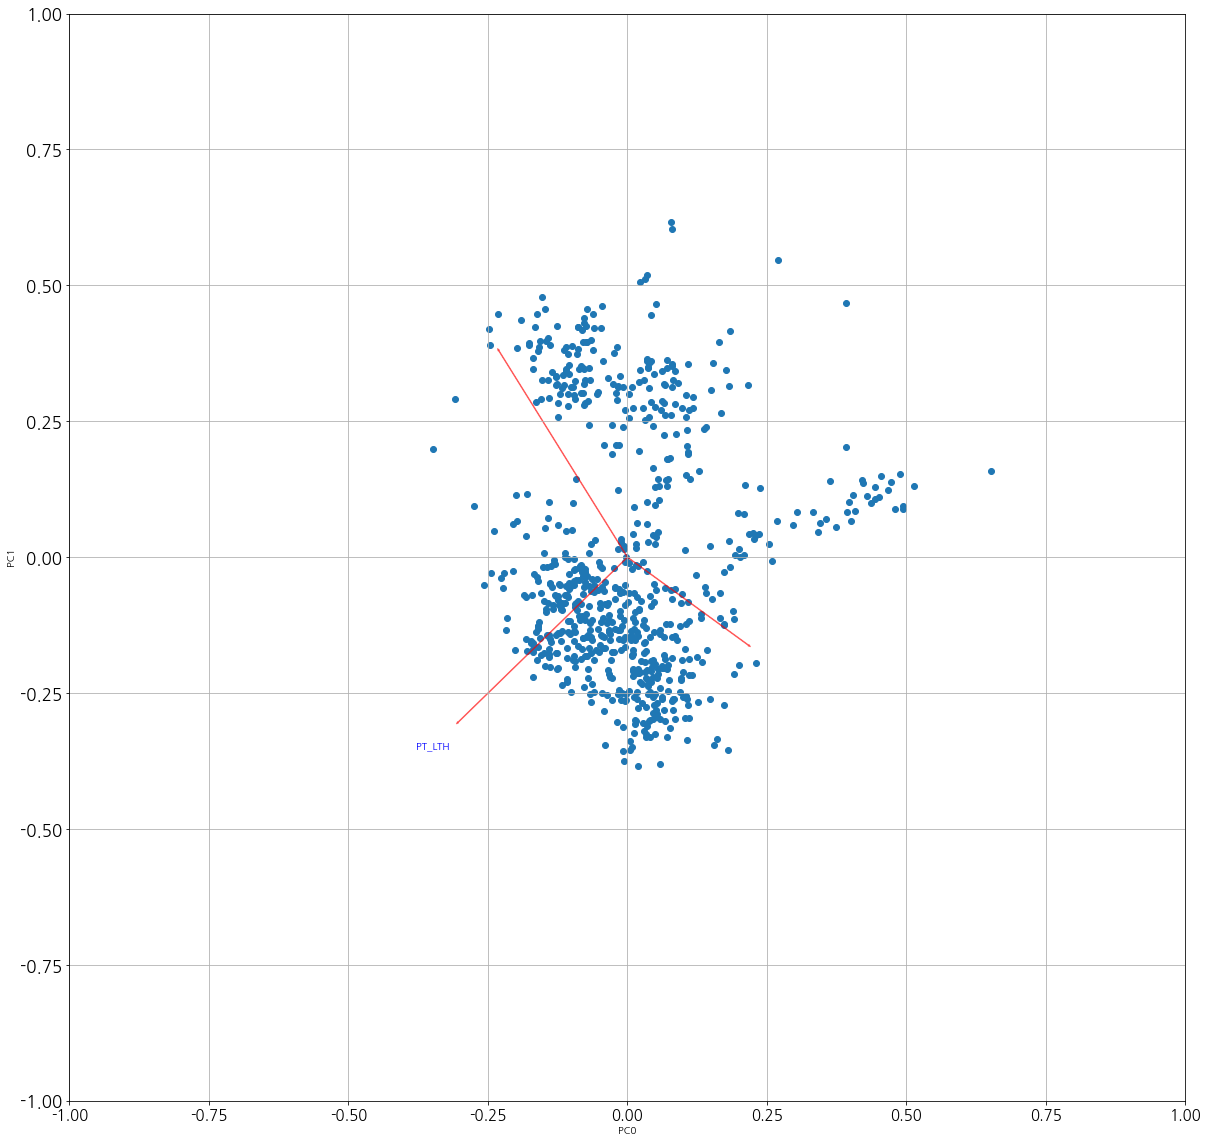

In [44]:
biplot(B, pca.components_, 0,1, labels=explain2.columns)

In [45]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.figure(figsize = (20,20))
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
        plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='blue', ha='center', va='center')
    else:
        plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='blue', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
# biplot(B, pca_wine.components_, 1, 2, labels=wine_feature.columns)

In [46]:
pca.components_

array([[ 0.38010769, -0.14121498, -0.34732825, -0.20714909, -0.34222383,
         0.12582704, -0.43117266,  0.19959917,  0.27247548, -0.43117266,
        -0.23060092],
       [-0.16202776, -0.2980516 ,  0.30598312,  0.34830217,  0.01010615,
         0.52893368,  0.01303381,  0.28324313,  0.51227783,  0.01303381,
         0.21703502],
       [-0.3035743 ,  0.59258189,  0.2362798 , -0.09304826,  0.02236759,
        -0.01918906, -0.09689292,  0.61657688, -0.01714529, -0.09689292,
        -0.30347523]])

In [47]:
#주성분 분석 및 결과: 고유값(Eigenvalue) 확인 및 주성분 개수 결정

#주성분 분석 통계량 저장: 주성분 분석, Eigevalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,4)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

PrinNo  EigenValues  EigenValueRatio  CumEigenValueRatio
0       1         4.81             0.44                0.44
1       2         1.53             0.14                0.58
2       3         1.19             0.11                0.68

In [48]:
explain2.describe()

PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  \
count  720.00   720.00  720.00  720.00       720.00       720.00       720.00   
mean    -0.00     0.00    0.00   -0.00        -0.00         0.00        -0.00   
std      1.00     1.00    1.00    1.00         1.00         1.00         1.00   
min     -0.90    -1.95   -1.91   -1.36        -2.51        -1.21        -2.09   
25%     -0.69    -0.66   -0.84   -0.96        -0.78        -0.63        -1.01   
50%     -0.48    -0.16    0.22   -0.22         0.13        -0.36         0.30   
75%      0.56     0.61    0.68    0.79         0.75         0.33         0.82   
max      3.71     3.42    1.49    2.98         2.43         5.94         2.01   

       FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       720.00    720.00      720.00           720.00  
mean          0.00      0.00       -0.00            -0.00  
std           1.00      1.00        1.00             1.00  
min          -1.20     -1.75       -2.09            -8.66  
25%          -0.58     -0.96       -1.01            -0.41  
50%          -0.31      0.08        0.30             0.16  
75%           0.20      0.91        0.82             0.56  
max           5.91      2.15        2.01             1.34

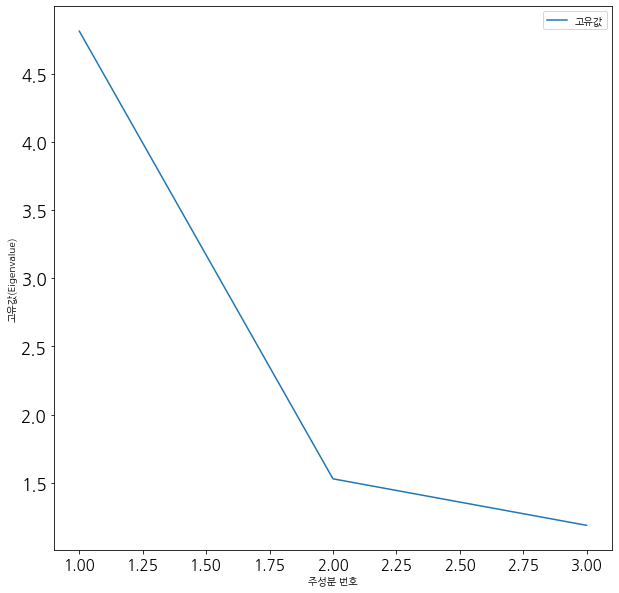

In [49]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')

#그래프 label, legend 설정
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [50]:
#고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValueRatio'], label = '고유값')

#누적 고유값의 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'], label = '누적고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')
# 위와 아래 그래프를 확인해 보면 

In [51]:
x_cols = pd.DataFrame({'Feature': explain.columns})

#주성분 Prin1~4까지의 고유벡터 저장
#전치 결과 pd.DataFrame(pca.components_,colums = ['Prin1'~'Prin4'], axis=1)
#파이썬 PCA 분석 시 SVD(singular value decomposition) 연산 방식의 차이 반영(전치, 부호 변경)

df_eigenvector = \
pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,columns = ['Prin1','Prin2','Prin3'])], axis=1)
df_eigenvector.round(3)

Feature  Prin1  Prin2  Prin3
0            PT_THK  -0.38   0.16   0.30
1           PT_WDTH   0.14   0.30  -0.59
2            PT_LTH   0.35  -0.31  -0.24
3            PT_WGT   0.21  -0.35   0.09
4       FUR_HZ_TEMP   0.34  -0.01  -0.02
5       FUR_HZ_TIME  -0.13  -0.53   0.02
6       FUR_SZ_TEMP   0.43  -0.01   0.10
7       FUR_SZ_TIME  -0.20  -0.28  -0.62
8          FUR_TIME  -0.27  -0.51   0.02
9        FUR_EXTEMP   0.43  -0.01   0.10
10  ROLLING_TEMP_T5   0.23  -0.22   0.30

#### Columns의 갯수가 그렇게 많지 않아서, 주성분분석의 의미가 크지 않은 것 같다.

KeyboardInterrupt: 

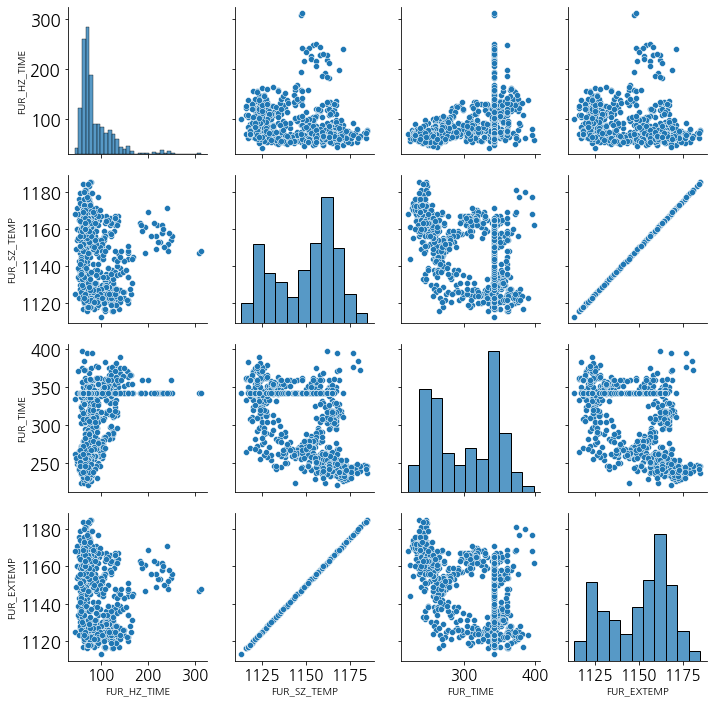

In [52]:
sns.pairplot(scale.loc[:, ['FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP']])
display(scale.loc[:, ['FUR_HZ_TEMP','FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP']].corr())

똑같은 값으로 아에 상관성이 명백한  FUR_SZ_TEMP 와 FUR_EXTEMP 중 1개는 drop하겠다.  

이런 결과를 보이는 이유는  균열대는 슬래브의 온도를 균질화하는 과정으로 균열대 온도까지 승온된 강재를 추출하기 때문에 가열로 추출온도와 동일한 것으로 보인다

또한, 생산지시 관련 변수인 LTH, WITH, WGT, THK는 고객의 요구사항이므로 변경할 수 없으므로, 제외한다.

##  3. 최종 잠재 Vital few 
##### 'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING' ,'FUR_HZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  


## 4. Modeling  


In [95]:
# modeling
from random import *
def modeling(df, model , randomseed, split_ratio= 0.5):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold
    #분류 Decision Tree, Random Forest, Gradient Boosting
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import export_graphviz
    import graphviz
    from IPython.core.display import Image
    #최적모델, 파라미터 탐색
    from sklearn.model_selection import GridSearchCV
    import pydot
    # 모델 성능 평가: F1 Score, ROC Curve, AUC
    from sklearn.metrics import f1_score, roc_curve, auc
    import matplotlib.pyplot as plt

    #모델 성능 평가
    from sklearn.metrics import confusion_matrix
    
    def make_ds(df, target):
        data_x = df.loc[:, ['STEEL_KIND', 'HSB','ROLLING_DESCALING', 'FUR_HZ_TIME',  'FUR_EXTEMP', 'ROLLING_TEMP_T5']]
        data_x =pd.get_dummies(data_x)
        data_y = df[target].astype('int')
        return data_x, data_y
    
    tree = DecisionTreeClassifier(min_samples_leaf=1,
                                  min_samples_split = 2, 
                                  max_depth = 10,
                                  random_state =randomseed)
    rf = RandomForestClassifier(min_samples_leaf=1,
                                max_depth = 10, n_estimators = 90,
                                random_state = randomseed)
    gb = GradientBoostingClassifier(min_samples_leaf= 2,
                                    max_depth=6,
                                    learning_rate=0.1,
                                    random_state=randomseed)
    model_list = [tree, rf, gb]
    
    
    data_x , data_y = make_ds(scale, 'SCALE')
    
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(data_x, data_y,
                                                               test_size = split_ratio, random_state = randomseed)

    
    
    print("train data X size : {}".format(df_train_x.shape))
    print("train data Y size : {}".format(df_train_y.shape))
    print("test data X size : {}".format(df_test_x.shape))
    print("test data Y size : {}".format(df_test_y.shape))
    
    v_feature_name = df_train_x.columns
    if model == 'dt':
        model_ = model_list[0]
        model_.fit(df_test_x, df_test_y)
        y_pred = model_.predict(df_test_x)
        
        import pydot
        export_graphviz(model_, out_file = "tree.dot", class_names = ['normal', 'scale'],
                feature_names = v_feature_name, impurity = True, filled= True)

        (graph,) = pydot.graph_from_dot_file('tree.dot', encoding ='utf8')
        graph.write_png('DT.png')
    
    elif model =='rf':
        
        model_ = model_list[1]
        model_.fit(df_test_x, df_test_y)
        y_pred = model_.predict(df_test_x)
        
        
        number = randint(0,90)
        
        estimator = model_.estimators_[number]

        export_graphviz(estimator, out_file='rf.dot', 
                feature_names = v_feature_name,
                class_names = ['normal', 'scale'],
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )
        (graph1,) = pydot.graph_from_dot_file('rf.dot', encoding ='utf8')
        graph1.write_png('rf.png')
        
        
        
    elif model == 'gb1':
        model_ = model_list[2]
        model_.fit(df_test_x, df_test_y)
        y_pred = model_.predict(df_test_x)
    y_pred = model_.predict(df_test_x)
    print('Train Accuracy:{0:.3f}\n'.format(model_.score(df_train_x,df_train_y)))
    print('Test Accuracy:{0:.3f}\n'.format(model_.score(df_test_x,df_test_y)))
    print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
    
    

    def validation(features, label, split, model):
        from sklearn.model_selection import StratifiedKFold
        from sklearn.metrics import accuracy_score
        skfold = StratifiedKFold(n_splits=5)
        cv_accuracy=[]
        n_iter=0
        display(skfold)
    
        for train_index, test_index  in skfold.split(features, label):
            X_train, X_test = features[train_index], features[test_index]
            y_train, y_test = label[train_index], label[test_index]

            #학습 및 예측 
            model_.fit(X_train , y_train)    
            pred = model_.predict(X_test)

            # 반복 시 마다 정확도 측정 
            n_iter += 1
            accuracy = np.round(accuracy_score(y_test,pred), 4)
            train_size = X_train.shape[0]
            test_size = X_test.shape[0]
            print()
            print('-------------------------------------------------------------------')
            print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
                  .format(n_iter, accuracy, train_size, test_size))
#             print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
            cv_accuracy.append(accuracy)

        # 교차 검증별 정확도 및 평균 정확도 계산 
        print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
        print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 
        print()
        print('--------------------------------------------------------')
    validation(np.array(data_x),data_y, 3, 'd')
    
    
    fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
    roc_auc = auc(fpr, tpr)
    print('AUC : {}'.format(roc_auc))
    print('F1 Score : {}'.format(f1_score(df_test_y, y_pred)))
    
    df_importance = pd.DataFrame()
    df_importance["Feature"] = v_feature_name
    df_importance["Importance"] = model_.feature_importances_
    
    df_importance.sort_values("Importance", ascending = False, inplace = True)
    df_importance7 = df_importance[:12]
    display(df_importance7.round(4))

    df_importance7.sort_values("Importance", ascending = True, inplace = True)
    coordinates = range(len(df_importance7))
    plt.barh(y= coordinates, width =df_importance7["Importance"])
    plt.yticks(coordinates, df_importance7["Feature"])
    plt.xlabel("Variable Importance")
    plt.ylabel("Variable")    

In [96]:
a = modeling(scale, 'dt' , 9981,0.4)

train data X size : (432, 20)
train data Y size : (432,)
test data X size : (288, 20)
test data Y size : (288,)
Train Accuracy:1.000

Test Accuracy:1.000

Confusion matrix:
[[194   0]
 [  0  94]]


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


-------------------------------------------------------------------

#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 576, 검증 데이터 크기: 144

-------------------------------------------------------------------

#2 교차 검증 정확도 :1.0, 학습 데이터 크기: 576, 검증 데이터 크기: 144

-------------------------------------------------------------------

#3 교차 검증 정확도 :1.0, 학습 데이터 크기: 576, 검증 데이터 크기: 144

-------------------------------------------------------------------

#4 교차 검증 정확도 :1.0, 학습 데이터 크기: 576, 검증 데이터 크기: 144

-------------------------------------------------------------------

#5 교차 검증 정확도 :1.0, 학습 데이터 크기: 576, 검증 데이터 크기: 144

## 교차 검증별 정확도: [1. 1. 1. 1. 1.]
## 평균 검증 정확도: 1.0

--------------------------------------------------------
AUC : 1.0
F1 Score : 1.0


Feature  Importance
2       ROLLING_TEMP_T5        0.54
12                HSB_0        0.16
1            FUR_EXTEMP        0.12
18  ROLLING_DESCALING_9        0.09
16  ROLLING_DESCALING_7        0.05
14  ROLLING_DESCALING_5        0.04
0           FUR_HZ_TIME        0.00
11        STEEL_KIND_T8        0.00
17  ROLLING_DESCALING_8        0.00
15  ROLLING_DESCALING_6        0.00
13                HSB_1        0.00
10        STEEL_KIND_T7        0.00

<ipython-input-95-8bba9de49e7a>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance7.sort_values("Importance", ascending = True, inplace = True)


In [ ]:
modeling(scale, 'gb1' ,9981, 0.4)

In [ ]:
modeling(scale, 'rf' ,9981, 0.5)

In [ ]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("DT.png")

In [ ]:
Image("rf.png")